In [138]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math
import sys
import copy

In [139]:
def read_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "randk_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

In [140]:
def read_single_window_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            if int(line.strip().split()[0]) == 0:
                                continue
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

In [141]:
def read_gt_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "randk_gt_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    sorted_fsd = dict(sorted(fsd.items()))
                            
                    res.append(sorted_fsd)
            
    return res

# read_fsd_data()

In [142]:
def parse_line(key, line):
    string_key = line.split(") ")[0]
    string_key += ")"

    left = line.split(") ")[1]

    left = left.replace("]", "")
    left = left.replace("[", "")
    splitted = left.split(" ")
    estimate = int(splitted[0])
    
    return string_key, estimate

In [175]:
def prepare_profiler_final_fsd_dict(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
                                epochs=['10']):
    fs_freq_map = {}
    profiler_file = []
    
    profiler_folder_path = "/home/ming/SketchMercator/pattern_detection/traffic_generator/pcap_file/"
    for file_name in sorted(os.listdir(profiler_folder_path)):
        if file_name.split("-")[0] == "zipf4":
            continue
        profiler_file.append(file_name)
        # has_same_dist = 0
        # if file_name.split("-")[0] == "zipf4":
        #     continue
        # for item in profiler_file:
        #     if file_name.split("-")[0] == item.split("-")[0]:
        #         has_same_dist = 1
        #         break
        # if has_same_dist == 0:
        #     profiler_file.append(file_name)
        
    
    for epoch in epochs:
        for file in profiler_file:
            path = f"../SketchPadding/{algo}/{file}/"\
                    f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
            
            for dir in sorted(os.listdir(path)):
                p = os.path.join(path, dir)
                if os.path.isdir(p): 
                    flowkey_path = os.path.join(p, "flowkey.txt")
                    fs_freq_map[file] = {}
            
                    f = open(flowkey_path)
                    key = f.readline().strip()
                    # print(key)
                    for line in f:
                        string_key, estimate = parse_line(key, line.strip())
                        fs_freq_map[file][string_key] = estimate
                    f.close()
            
    return fs_freq_map


In [144]:
def get_profiler_sampled_fsd(profiler_fs_freq_map, randomk_key):
    fsd = {}
    for key in randomk_key:
        if key in profiler_fs_freq_map.keys():
            if profiler_fs_freq_map[key] in fsd.keys():
                fsd[profiler_fs_freq_map[key]] += 1
            else:
                fsd[profiler_fs_freq_map[key]] = 1
                
    sorted_fsd = dict(sorted(list(fsd.items())))
        
    return sorted_fsd
            

In [145]:
def get_sampled_flowkey(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
                            epochs=['10'], dataset = "caida0517-125w_10_.pcap", window_size=200, predict_time=1):
    
    sampled_flowkey = []
    for epoch in epochs:
        
        path = f"../SketchPadding/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                for l in range(0, 1):
                    key_window_dir = '%s/level_%02d/key_window_%d/' % (p, l, window_size)
                    if not os.path.isdir(key_window_dir):
                        continue
                    
                    cnt = 0 # count for predict dist
                    for file in sorted(os.listdir(key_window_dir)):
                        key_list = []
                        key_window_path = os.path.join(key_window_dir, file)
                            
                        f = open(key_window_path)
                        key = f.readline().strip()
                        for line in f:
                            string_key, estimate = parse_line(key, line.strip())
                            key_list.append(string_key)
                            
                        f.close()
                        
                        sampled_flowkey.append(key_list)
                        
                        cnt += 1
                        if predict_time != 0 and cnt >= int(predict_time*1000/window_size):
                            break
                        
                              
    return sampled_flowkey


## Prepare Dataset

In [238]:
## parameters

caida0517 = ["caida0517-500w", "caida0517-250w", "caida0517-125w"]
caida0816 = ["caida0816-600w", "caida0816-300w", "caida0816-150w"]
zipf2a = ["zipf2a-150w", "zipf2a-75w", "zipf2a-35w"]
zipf2b = ["zipf2b-400w", "zipf2b-200w", "zipf2b-100w"]
zipf4 = ["zipf4-60w", "zipf4-30w", "zipf4-15w"]


lens = [
        # ["5", "5"],
        ["6", "4"],
        # ["7", "3"],
        # ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
pcap_file.append("caida0517-500w_10_.pcap")
pcap_file.append("caida0517-250w_10_.pcap")
pcap_file.append("caida0517-125w_10_.pcap")
pcap_file.append("caida0816-600w_10_.pcap")
pcap_file.append("caida0816-300w_10_.pcap")
pcap_file.append("caida0816-150w_10_.pcap")
pcap_file.append("zipf2a-150w_10_.pcap") 
pcap_file.append("zipf2a-75w_10_.pcap") 
pcap_file.append("zipf2a-35w_10_.pcap") 
pcap_file.append("zipf2b-400w_10_.pcap") 
pcap_file.append("zipf2b-200w_10_.pcap") 
pcap_file.append("zipf2b-100w_10_.pcap") 


# # # same dist, caida
for a in caida0517:
    for b in caida0816:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
for a in caida0816:
    for b in caida0517:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

            
# # same dist, zipf
for a in zipf2a:
    for b in zipf2b:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
for a in zipf2b:
    for b in zipf2a:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # diff dist, caida + zipf2a
for a in caida0517:
    for b in zipf2a:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
for a in caida0816:
    for b in zipf2a:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # diff dist, caida + zipf2b
for a in caida0517:
    for b in zipf2b:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
for a in caida0816:
    for b in zipf2b:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # diff dist, zipf2a + caida
for a in zipf2a:
    for b in caida0517:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
    for b in caida0816:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # diff dist, zipf2b + caida
for a in zipf2b:
    for b in caida0517:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
    for b in caida0816:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida0517-500w_10_.pcap', 'caida0517-250w_10_.pcap', 'caida0517-125w_10_.pcap', 'caida0816-600w_10_.pcap', 'caida0816-300w_10_.pcap', 'caida0816-150w_10_.pcap', 'zipf2a-150w_10_.pcap', 'zipf2a-75w_10_.pcap', 'zipf2a-35w_10_.pcap', 'zipf2b-400w_10_.pcap', 'zipf2b-200w_10_.pcap', 'zipf2b-100w_10_.pcap', 'caida0517-500w_6_caida0816-600w_4.pcap', 'caida0517-500w_6_caida0816-300w_4.pcap', 'caida0517-500w_6_caida0816-150w_4.pcap', 'caida0517-250w_6_caida0816-600w_4.pcap', 'caida0517-250w_6_caida0816-300w_4.pcap', 'caida0517-250w_6_caida0816-150w_4.pcap', 'caida0517-125w_6_caida0816-600w_4.pcap', 'caida0517-125w_6_caida0816-300w_4.pcap', 'caida0517-125w_6_caida0816-150w_4.pcap', 'caida0816-600w_6_caida0517-500w_4.pcap', 'caida0816-600w_6_caida0517-250w_4.pcap', 'caida0816-600w_6_caida0517-125w_4.pcap', 'caida0816-300w_6_caida0517-500w_4.pcap', 'caida0816-300w_6_caida0517-250w_4.pcap', 'caida0816-300w_6_caida0517-125w_4.pcap', 'caida0816-150w_6_caida0517-500w_4.pcap', 'caida0816-150w_6_caida

### Predict by MRD changes in adjacent timepoint

In [147]:
def prepare_profiler_bins():
    res = {}
    
    profiler_path = "../traffic_generator/fs_dist/"
    profiler_fsd = []
    for file in sorted(os.listdir(profiler_path)):
        profiler_fsd.append(file)
        
    for file in profiler_fsd:
        path = os.path.join(profiler_path, file)
        
        # Read file to get profilers' flow size distribution
        fsd = {}
        fn = 0
        with open(path, 'r') as f:
            for line in f:
                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                fn += int(line.strip().split()[1])
                
        # calcualte CDF
        cdf = {}
        culmulative_prob = 0.0
        for fs, freq in sorted(fsd.items()):
            culmulative_prob += (freq/fn)
            cdf[fs] = culmulative_prob
            
        # get bins
        bin = {}
        idx = 0
        for fs, prob in sorted(cdf.items()):
            while idx < round(prob * 100):
                bin[idx] = fs
                idx += 1
                
        res[file[:-4]] = bin
            
    return res
    
# prepare_profiler_bins()

In [148]:
def get_quantized_mapping(fsd, bins):
    qfsd = {}
    idx = 0
    for fs, freq in sorted(fsd.items()):
        while fs > bins[idx]:
            if idx < len(bins) - 1:
                idx += 1
            else:
                break
            
        if bins[idx] in qfsd.keys():
            qfsd[bins[idx]] += freq
        else:
            qfsd[bins[idx]] = freq
            
        
    return qfsd

In [149]:
def plot_mrd_variation(mrd_var, name, window_size=200, typ='Var'):
    
    res = []
    
    res.append(mrd_var)
    
    print(name)
    print(mrd_var)

    plt.figure(figsize=(12, 4))
        
    for i in range(len(res)):
        plt.plot(res[i], label=f'MRD {typ}')

    # Add labels and legend
    plt.xlabel('Time (sec)')
    if typ == "MRD":
        plt.ylabel('MRD')
    else:
        plt.ylabel('Value')
    plt.title('%s MRD Variation' % (name))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

In [150]:
def changes_occured(sec_var, n, ws=20):
    
    time_sec_var = -1.0
    
    val = 0
    max_time = -1.0
    
    # for each sliding window           
    for i in range(len(sec_var) - ws + 1):            
        sec_var_mean = np.mean(sec_var[0+i:ws+i])
        sec_var_std_dev = np.std(sec_var[0+i:ws+i])
        
        # check by sec var outliers
        if abs(sec_var[ws+i-1] - sec_var_mean) > (n * sec_var_std_dev):
            if time_sec_var == -1.0:
                time_sec_var = (4+(ws+i-1)-1)/5
                val = sec_var[ws+i-1]
                break
                
    if val == 0:
        val = max(sec_var)
        max_time = (4 + sec_var.index(val) - 1)/5
        
    sec_var_hit = 0
    
    if time_sec_var != -1.0:
        sec_var_hit = 1
    
    return sec_var_hit, time_sec_var, val, max_time
    
    

In [151]:
def calculate_mrd(fsd1, fsd2):
    MRD_nom = 0
    MRD_denom = 0
    for i in range(1, max(fsd1.keys())+1):
        if i in fsd1.keys():
            true = fsd1[i]
        else:
            true = 0
            
        if i in fsd2.keys():
            est = fsd2[i]
        else:
            est = 0
            
        MRD_nom += abs(true - est)
        MRD_denom += float(true + est)/2
    MRD = MRD_nom/MRD_denom
    
    return MRD

    # MRD_nom = 0
    # MRD_denom = 0
    # for key in fsd1.keys():
    #     true = fsd1[key]
    #     if key in fsd2.keys():
    #         est = fsd2[key]
    #     else:
    #         est = 0
            
    #     MRD_nom += abs(true - est)
    #     MRD_denom += float(true + est)/2
    # MRD = MRD_nom/MRD_denom
    
    # return MRD

In [202]:
def read_single_window_gt_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_gt_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            if int(line.strip().split()[0]) == 0:
                                continue
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

In [243]:
def predict(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=20):
    
    # top 100
    res_fsd = {}
    res_mrd = {}
    res_mrd_var = {}
    res_mrd_sec_var = {}
    # res_sec_var = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_mrd[name] = [None, None] # 0, 1
            res_mrd_var[name] = [None, None, None] # 0, 1, 2
            res_mrd_sec_var[name] = [None, None, None, None] # 0, 1, 2, 3
            
            # fsd_total = read_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            # fsd_total = read_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            # fsd_total = read_single_window_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            fsd_total = read_single_window_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_fsd[name] = fsd_total[:-1] # ignore last window (less than 200ms)
            
            for i in range(1, len(res_fsd[name])):
                res_mrd[name].append(calculate_mrd(res_fsd[name][i-1], res_fsd[name][i]))
                
            # print(len(res_fsd[name]), len(res_mrd[name]), res_mrd[name])
                
            # plot_mrd_variation(res_mrd[name], d[:-5], window_size, 'MRD')
                
            for i in range(3, len(res_mrd[name])):
                res_mrd_var[name].append(abs(res_mrd[name][i] - res_mrd[name][i-1]))
                
            # plot_mrd_variation(res_mrd_var[name], d[:-5], window_size, 'Var')
                
            for i in range(4, len(res_mrd_var[name])):
                res_mrd_sec_var[name].append(abs(res_mrd_var[name][i] - res_mrd_var[name][i-1]))
                
            # plot_mrd_variation(res_mrd_sec_var[name], d[:-5], window_size, 'Sec Var')
            # print(len(res_mrd_var[name]), len(res_mrd_sec_var[name]))

    # # print(answer)
    ignore = int(1000/window_size)
    choose = 5
    # dev = 3.4 # 99.90%
    # dev = 3 # 99.90%
    # dev = 3.719 # 99.99%
    iqr = 1.5
    
    pred = []
    
    norm_hit = 0
    iqr_hit = 0
    
    hit = []
    
    for i in range(len(label)):
        
        sec_var_hit, time_sec_var, val, max_time = changes_occured(res_mrd_sec_var[label[i]][4:], dev, ws)
        
        pred.append(time_sec_var)
           
        print(i)
        print(label[i])
        print('\tFSD MRD ')
        # print('\t\t', var_max3, var_avg3, var_diff3)
        # print('\t\t', max(res_sec_var3[label[i]][(1+ignore):end]), sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end]), max(res_sec_var3[label[i]][(1+ignore):end]) - (sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end])))
        print('\t\t', res_mrd_sec_var[label[i]])
        print(f'\t\tsec var: {time_sec_var}, ans: {answer[i]}, change: {sec_var_hit}')
        print(f'\t\t{val}, max time: {max_time}')
        print()
        
        if answer[i] == 10:
            if sec_var_hit == 0:
                hit.append(1)
            else:
                hit.append(0)
        else:
            if sec_var_hit == 1:
                hit.append(1)
            else:
                hit.append(0)
            
        

    succ = 0

    for i in range(len(label)):
        if hit[i] == 1:
            if answer[i] == 10:
                succ += 1
            else:
                if abs(pred[i] - answer[i]) <= 1.0:
                    succ += 1
    
    print("single comprehensive predict")
    print(f' total flow  predict: {succ}/{len(pred)} {succ*100/len(pred)}%')
    print()
    
    
    
    
        
# predict_final_dynamic_topk(width=widths, datasets=pcap_file)

In [244]:
predict(width=widths, datasets=pcap_file[30:48], window_size=200, dev=3.4, ws=25)

0
zipf2a-150w_6_zipf2b-400w_4_4096
	FSD MRD 
		 [None, None, None, None, 0.16159633210116553, 0.0263976324277847, 0.03781927474590768, 0.017775134635081125, 0.0270766583110455, 0.025210400358624624, 0.007172639110321677, 0.02622653083133944, 0.00856713691567973, 0.13616863711827737, 0.029187785728483406, 0.09733511507649434, 0.018683370944279687, 0.009816746000024246, 0.02241306738045501, 0.01175560268240955, 0.0002877391416948316, 0.011011526672183303, 0.015687845732427375, 0.051348921861301355, 0.0637833524025131, 0.012588228019187075, 0.06789823802193995, 0.03749198755920474, 0.014592451597862377, 0.03238056781363868, 0.07765004190214236, 0.900523857537782, 0.25362525474232767, 0.5467423892111527, 0.176269098561664, 0.015265672022453491, 0.06486255884971254, 0.038614221592588704, 0.014661371010002422, 0.010370911467594501, 0.038203780713714, 0.03940519731567216, 0.022013066832443196, 0.051241158248712115, 0.039056541769232234, 0.10929795467108905, 0.06868031918763995, 0.033608989830

### Predict by MRD changes (from profiler) in adjacent timepoint

In [16]:
def get_profiler_fsd():
    # get profiler dist
    profiler_fsd = {}
    profiler_path = "../traffic_generator/fs_dist/"
    for file in sorted(os.listdir(profiler_path)):
        # print(file)
        path = os.path.join(profiler_path, file)
        
        # Read file to get profilers' flow size distribution
        fsd = {}
        fn = 0
        with open(path, 'r') as f:
            for line in f:
                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                fn += int(line.strip().split()[1])
    
        profiler_fsd[file[:-4]] = fsd
        
    return profiler_fsd

In [17]:
# calculate jsd
import numpy as np
from scipy.spatial.distance import jensenshannon

def calculate_jsd(fsd1, fsd2):
    
    # Convert dictionaries to arrays for easier manipulation
    keys = sorted(set(fsd1.keys()) | set(fsd2.keys()))
    flow_sizes = np.array(keys)
    freq1 = np.array([fsd1.get(flow_size, 0) for flow_size in keys])
    freq2 = np.array([fsd2.get(flow_size, 0) for flow_size in keys])

    # Calculate probability distributions
    prob_distribution1 = freq1 / np.sum(freq1)
    prob_distribution2 = freq2 / np.sum(freq2)

    # Calculate Jensen-Shannon divergence
    js_distance = jensenshannon(prob_distribution1, prob_distribution2)

    # print("Jensen-Shannon Divergence:", js_distance)
    return  js_distance

In [102]:
def predict_by_dist(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=20):
    
    # top 10000
    res_fsd = {}
    res_flowkey = {}
    res_mrd = {}
    res_mrd_var = {}
    res_mrd_sec_var = {}
    # res_sec_var = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_mrd[name] = [None] 
            res_mrd_var[name] = [None, None]
            res_mrd_sec_var[name] = [None, None, None]
            
            # fsd_total = read_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            fsd_total = read_single_window_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            # fsd_total = read_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_fsd[name] = fsd_total[:-1] # ignore last window (less than 200ms)
            res_flowkey[name] = get_sampled_flowkey(dataset=d, width=w, predict_time=0)
            

    # # print(answer)
    ignore = int(1000/window_size)
    choose = 5
    # dev = 3.4 # 99.90%
    # dev = 3 # 99.90%
    # dev = 3.719 # 99.99%
    iqr = 1.5
    
    pred = []
    
    norm_hit = 0
    iqr_hit = 0
    
    hit = []
    
    # # find dist
    # for i in range(len(label)):
    #     target_dist = []
    #     print(label[i])
    #     for j in range(int(1000/window_size)):
    #         dist_name, dist = find_distribution(res_fsd[label[i]][4+j])
    #         print(dist_name)
    #     print("---\n")
        
    # profiler_fsd = get_profiler_fsd()
    profiler_fsd_dict = prepare_profiler_final_fsd_dict()
    
    
    for i in range(len(label)):
        
        # get profiler fsd
        target_fsd_dict = profiler_fsd_dict[(label[i].split("_")[0] + "_10_.pcap")]
        
        print("profiler: ", label[i].split("_")[0])
        
        # calculate mrd
        for j in range(0, len(res_fsd[label[i]])):
            target_sampled_fsd = get_profiler_sampled_fsd(target_fsd_dict, res_flowkey[label[i]][j])
            res_mrd[label[i]].append(calculate_mrd(target_sampled_fsd, res_fsd[label[i]][j]))
            # res_mrd[label[i]].append(calculate_jsd(target_fsd, res_fsd[label[i]][j]))
            # res_mrd[label[i]].append(calculate_mrd(res_fsd[label[i]][j], target_fsd))
        # plot_mrd_variation(res_mrd[label[i]], label[i], window_size, 'MRD')

        for j in range(2, len(res_mrd[label[i]])):
            res_mrd_var[label[i]].append(abs(res_mrd[label[i]][j] - res_mrd[label[i]][j-1]))  
            
        for j in range(3, len(res_mrd_var[label[i]])):
            res_mrd_sec_var[label[i]].append(abs(res_mrd_var[label[i]][j] - res_mrd_var[label[i]][j-1]))
            
        # plot_mrd_variation(res_mrd[label[i]], label[i], window_size, 'MRD')
        # plot_mrd_variation(res_mrd_var[label[i]], label[i], window_size, 'Var')
        # plot_mrd_variation(res_mrd_sec_var[label[i]], label[i], window_size, 'Sec Var')
        
        sec_var_hit, time_sec_var, val, max_time = changes_occured(res_mrd_sec_var[label[i]][3:], dev, ws)
        
        pred.append(time_sec_var)
           
        print(i)
        print(label[i])
        print('\tFSD MRD ')
        # print('\t\t', var_max3, var_avg3, var_diff3)
        # print('\t\t', max(res_sec_var3[label[i]][(1+ignore):end]), sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end]), max(res_sec_var3[label[i]][(1+ignore):end]) - (sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end])))
        print('\t\t', res_mrd_sec_var[label[i]])
        print(f'\t\tsec var: {time_sec_var}, ans: {answer[i]}, change: {sec_var_hit}')
        print(f'\t\t{val}, max time: {max_time}')
        print()
        
        if answer[i] == 10:
            if sec_var_hit == 0:
                hit.append(1)
            else:
                hit.append(0)
        else:
            if sec_var_hit == 1:
                hit.append(1)
            else:
                hit.append(0)
            
        

    succ = 0

    for i in range(len(label)):
        if hit[i] == 1:
            if answer[i] == 10:
                succ += 1
            else:
                if abs(pred[i] - answer[i]) <= 1.0:
                    succ += 1
    
    print("single comprehensive predict")
    print(f' FSD predict: {succ}/{len(pred)} {succ*100/len(pred)}%')
    print()
    
    

In [101]:
predict_by_dist(width=widths, datasets=pcap_file, window_size=200, dev=3, ws=25)

47 47
47 47
47 47
49 49
49 49
49 49
49 49
49 49
49 49
49 49
49 49
49 49
profiler:  caida0517-500w
0
caida0517-500w_10__4096
	FSD MRD 
		 [None, None, None, 0.036519502879460264, 0.02755349180585398, 0.03395026690966141, 0.0036965875598944375, 0.0028212034314674117, 0.0053481225509226515, 0.014493705182910377, 0.004096091437786553, 0.01572748833479265, 0.002367044503094995, 0.027098254386934917, 0.010171271339969312, 0.007314564302932869, 0.02068081490602136, 0.018691779060943103, 0.0023896977333170977, 0.010524830207911506, 0.008380051320648452, 0.0008898269297372696, 0.006783649339611841, 0.0017908908086203823, 0.02958256773525947, 0.023136932049014236, 0.004299259458330651, 0.0019253426190182221, 0.0012907145925526997, 0.02891919513272123, 0.029040938732030286, 0.0017566331836225135, 0.00949033713630909, 0.005468497102169012, 0.0037679690896115225, 0.0022280669080716464, 0.01662857563043607, 0.017503701689501217, 0.02435151880561648, 0.012188277315496876, 0.009330957268478102, 0.0010

### Predict distribution

In [157]:
def plot_mrd(file_name, mrd_list, window_size, predict_time, ans):
    
    res = []
    labels = []
    
    for i in range(len(mrd_list[0])):
        single_mrd = []
        for j in range(len(mrd_list)):
            single_mrd.append(mrd_list[j][i])
        res.append(single_mrd)
        
    profiler_folder_path = "/home/ming/SketchMercator/pattern_detection/traffic_generator/pcap_file/"
    for name in sorted(os.listdir(profiler_folder_path)):
        if name.split("-")[0] == "zipf4":
            continue
        labels.append(name.split("_")[0])    
        
        
    plt.figure(figsize=(8, 4))
    
    for i in range(0, len(res)):
        if labels[i] == ans:
            plt.plot(res[i], label=labels[i], color='tab:red', linewidth=3.0)
        else:
            plt.plot(res[i], label=labels[i])

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('MRD')
    plt.title('%s ,Random K MRD Variation' % (file_name))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(predict_time*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left')

    # Show the plot
    plt.show()

In [158]:
def find_distribution(profiler_fsd_dict, flowkey_list, unknown_fsd):
    # get profiler dist
    profiler_fsd = {}
    for name, map in profiler_fsd_dict.items():
        profiler_fsd[name] = get_profiler_sampled_fsd(map, flowkey_list)
        
    all_mrd = {}
    min_mrd = sys.float_info.max
    predict_dist = ""
    for name, dist in profiler_fsd.items():
        if dist == {}:
            # print(name, "is empty")
            mrd = abs(calculate_mrd(unknown_fsd, dist))
            # continue
        else:
            mrd = calculate_mrd(dist, unknown_fsd)
        all_mrd[name] = mrd
        if mrd < min_mrd:
            min_mrd = mrd
            predict_dist = name
    # for name, dist in profiler_fsd.items():
    #     mrd = calculate_mrd(dist, unknown_fsd)
    #     all_mrd[name] = mrd
    #     if mrd < min_mrd:
    #         min_mrd = mrd
    #         predict_dist = name
           
    # print(all_mrd)
    # print(predict_dist)       
    
    mrds = []
    for name, mrd in all_mrd.items():
        mrds.append(mrd)
    
    # print(len(mrds))
    # return predict_dist, profiler_fsd[predict_dist]
    return predict_dist, mrds
    

In [181]:
def predict_distribution(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=20):
    
    # top 10000
    res_fsd = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            
            fsd_total = read_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            # fsd_total = read_single_window_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            # fsd_total = read_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_fsd[name] = fsd_total
            
    
    # find dist
    success = 0
    predict_time = 2
    profiler_fsd_dict = prepare_profiler_final_fsd_dict()
    for i in range(len(label)):
        pcap_file_name = label[i][:-5] + ".pcap"
        sampled_flowkey = get_sampled_flowkey(dataset=pcap_file_name, predict_time=predict_time)
        # print(len(sampled_flowkey))
        print("now finding ", pcap_file_name, "'s distribution")
        vote = {}
        all_mrds = []
        for j in range(int(predict_time * 1000 / window_size)):
            dist_name, mrds = find_distribution(profiler_fsd_dict, sampled_flowkey[j], res_fsd[label[i]][j])
            all_mrds.append(mrds)
            # break
            # print(dist_name)
            if dist_name in vote:
                vote[dist_name] += 1
            else:
                vote[dist_name] = 1
        
        if pcap_file_name.split("_")[0] == max(vote, key=vote.get).split("_")[0]:
            success += 1
        else:
            if pcap_file_name.split("-")[0] == max(vote, key=vote.get).split("-")[0]:
                success += 1
        
        print("==> ", max(vote, key=vote.get))
        # plot_mrd(pcap_file_name[:-5], all_mrds, window_size, predict_time, pcap_file_name.split("_")[0])
        print("---\n")
        
    
    print(f"predict : {success}/{len(label)} , ({success*100/len(label)} %)")
 

In [182]:
predict_distribution(width=widths, datasets=pcap_file, window_size=200, dev=3, ws=25)

now finding  caida0517-500w_10_.pcap 's distribution
==>  caida0517-250w_10_.pcap
---

now finding  caida0517-250w_10_.pcap 's distribution
==>  caida0517-250w_10_.pcap
---

now finding  caida0517-125w_10_.pcap 's distribution
==>  caida0517-125w_10_.pcap
---

now finding  caida0816-600w_10_.pcap 's distribution
==>  zipf2b-400w_10_.pcap
---

now finding  caida0816-300w_10_.pcap 's distribution
==>  zipf2b-400w_10_.pcap
---

now finding  caida0816-150w_10_.pcap 's distribution
==>  zipf2b-400w_10_.pcap
---

now finding  zipf2a-150w_10_.pcap 's distribution
==>  zipf2a-150w_10_.pcap
---

now finding  zipf2a-75w_10_.pcap 's distribution
==>  zipf2a-75w_10_.pcap
---

now finding  zipf2a-35w_10_.pcap 's distribution
==>  zipf2a-35w_10_.pcap
---

now finding  zipf2b-400w_10_.pcap 's distribution
==>  zipf2b-400w_10_.pcap
---

now finding  zipf2b-200w_10_.pcap 's distribution
==>  zipf2b-400w_10_.pcap
---

now finding  zipf2b-100w_10_.pcap 's distribution
==>  zipf2b-200w_10_.pcap
---

now f

### Test WMRD work

caida0517-125w 810


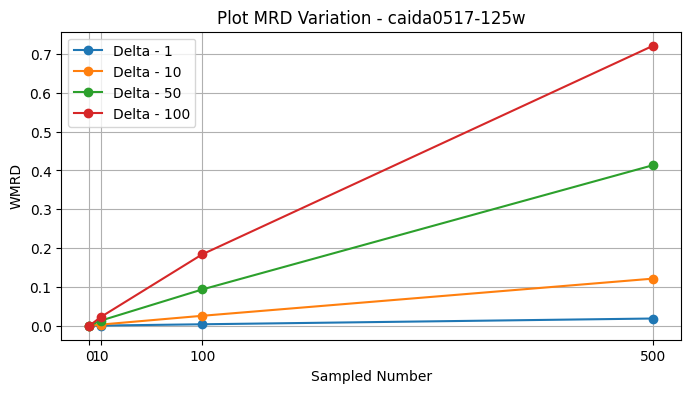

---
caida0517-250w 1156


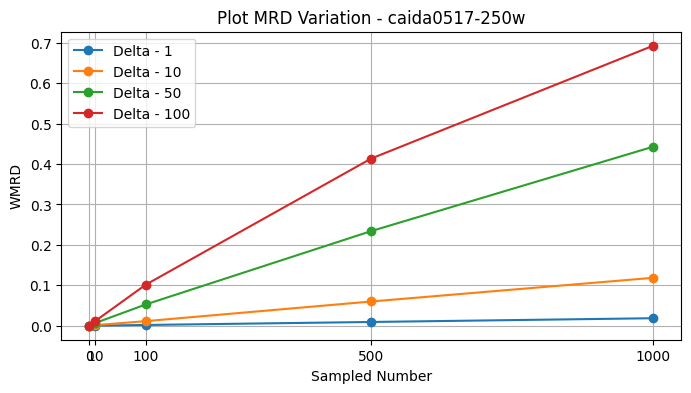

---
caida0517-500w 1653


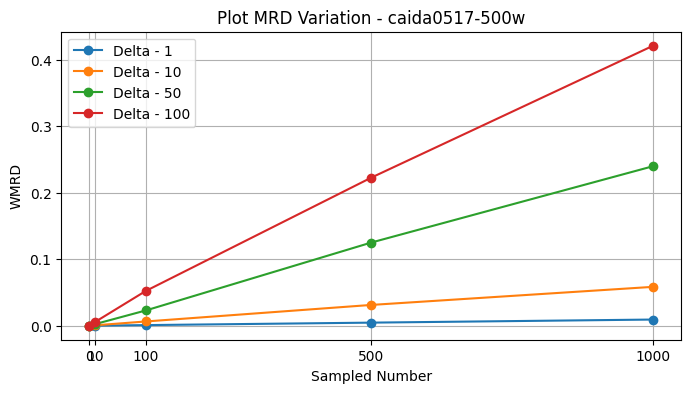

---
caida0816-150w 905


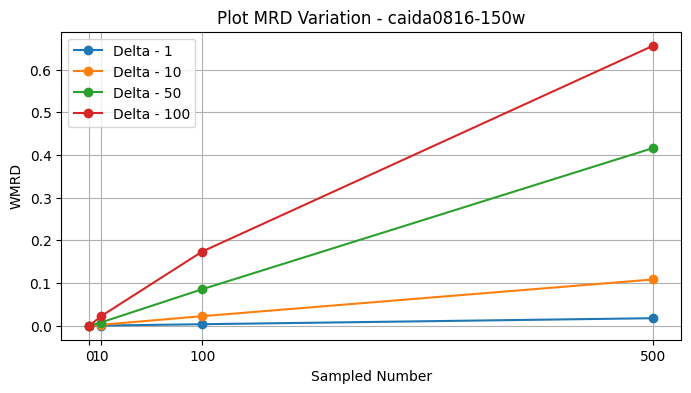

---
caida0816-300w 1273


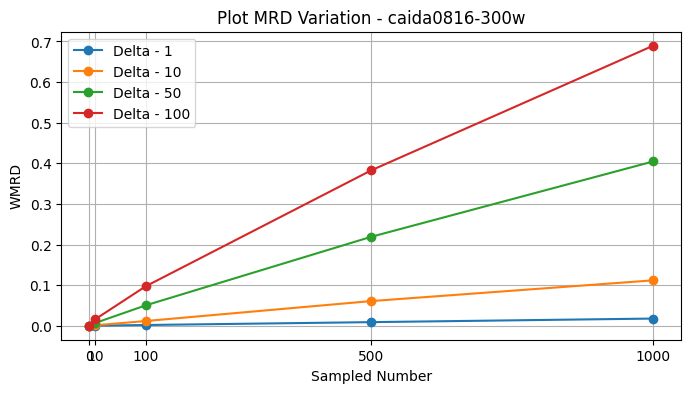

---
caida0816-600w 1835


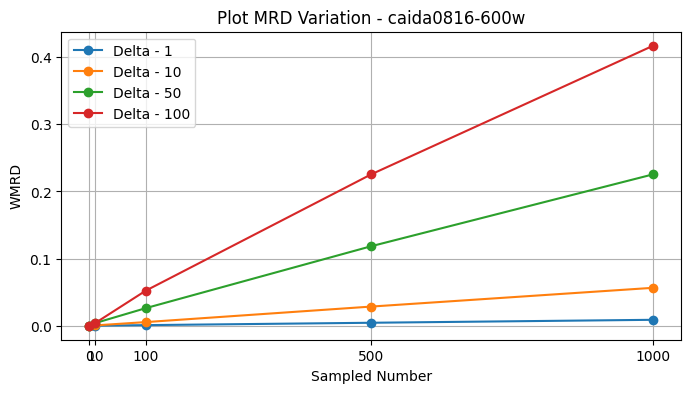

---
zipf2a-150w 761


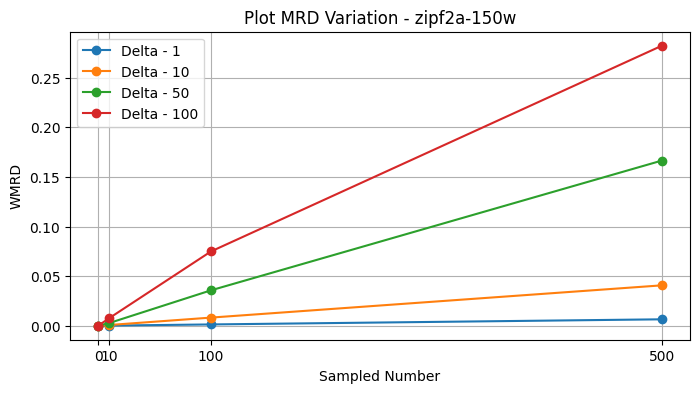

---
zipf2a-35w 323


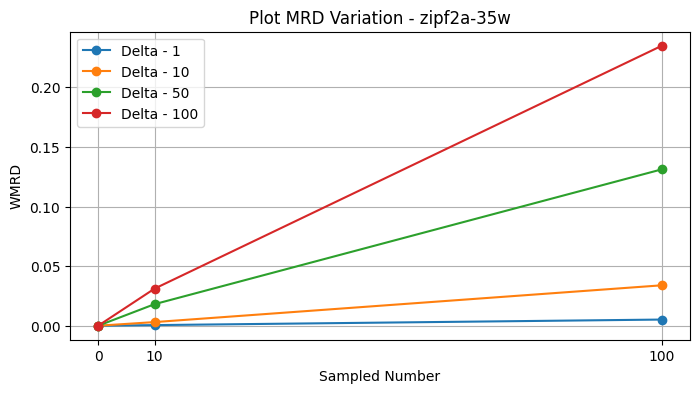

---
zipf2a-75w 494


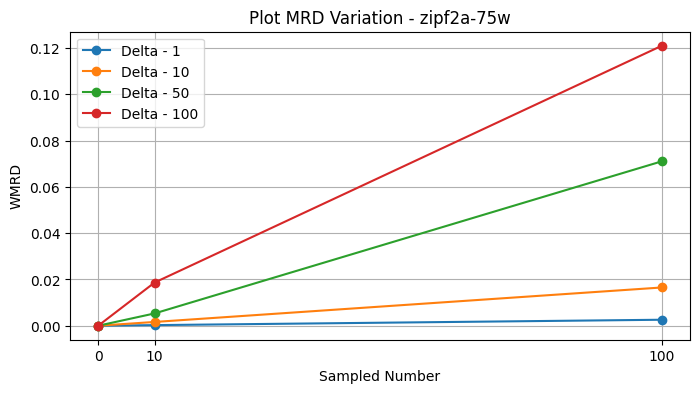

---
zipf2b-100w 608


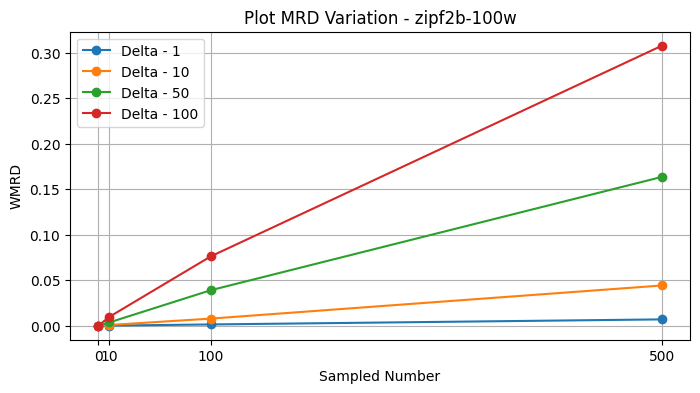

---
zipf2b-200w 912


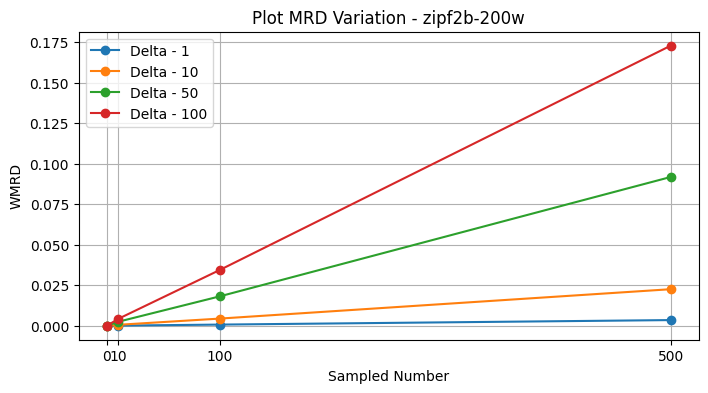

---
zipf2b-400w 1391


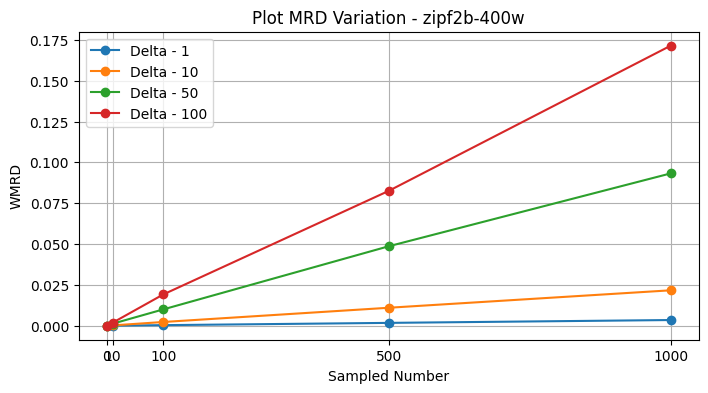

---
zipf4-15w 178


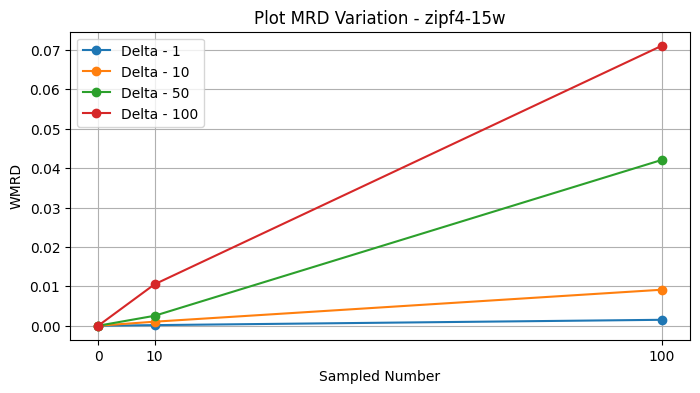

---
zipf4-30w 260


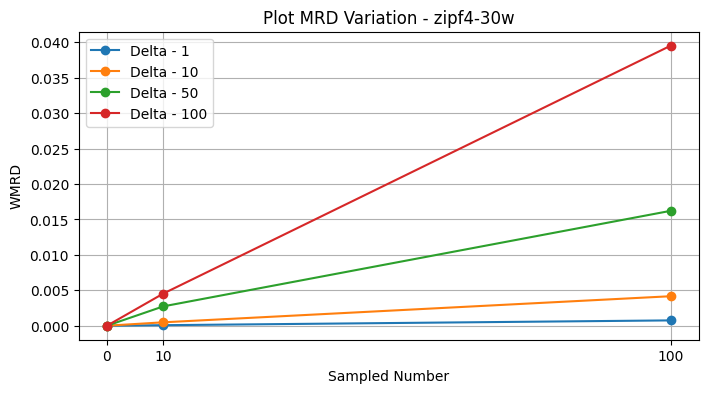

---
zipf4-60w 394


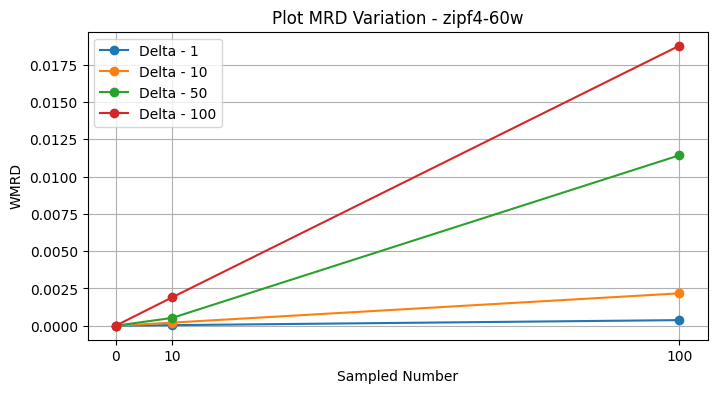

---


In [73]:
## test WMRD work
def cal_mrd(fsd1, fsd2):
    
    MRD_nom = 0
    MRD_denom = 0
    for i in range(1, max(fsd1.keys())+1):
        if i in fsd1.keys():
            true = fsd1[i]
        else:
            true = 0
            
        if i in fsd2.keys():
            est = fsd2[i]
        else:
            est = 0
            
        MRD_nom += abs(true - est)
        MRD_denom += float(true + est)/2
    MRD = MRD_nom/MRD_denom
    
    return MRD
 
def plot(mrd_var, name):
    plt.figure(figsize=(8, 4))
    # Plot each data point
    for delta, data_dict in mrd_var.items():
        x = list(data_dict.keys())
        y = list(data_dict.values())
        plt.plot(x, y, marker='o', linestyle='-', label=f'Delta - {delta}')

    # Customize the plot
    plt.xlabel('Sampled Number')
    plt.ylabel('WMRD')
    plt.xticks(list(mrd_var[next(iter(mrd_var))].keys()))
    plt.title('Plot MRD Variation - %s' % (name))
    plt.grid(True)
    plt.legend()
    plt.show()
    
    
    
profiler_fsd = get_profiler_fsd()
sample_list = [10, 100, 500, 1000, 5000]
# sample_list = [500]
delta = [1, 10, 50, 100]
for key in profiler_fsd.keys():
    print(key, len(profiler_fsd[key].keys()))
    
    mrd_var = {}
    for d in delta:
        changed_profiler_fsd = {}
        # changed_profiler_fsd[0] = profiler_fsd[key]
        for ss in sample_list:
            fsd = copy.deepcopy(profiler_fsd[key])
            # print(ss, len(fsd.keys()))
            if ss > len(fsd.keys()):
                break
            key_list = list(profiler_fsd[key].keys())
            random.shuffle(key_list)
            for i in range(ss):
                if random.randint(1,2) == 1: 
                    fsd[key_list[i]] = max(0, fsd[key_list[i]]-d)
                else:
                    fsd[key_list[i]] += d
                    
            changed_profiler_fsd[ss] = dict(sorted(fsd.items()))
            
        # for item in changed_profiler_fsd.items():
        #     print(item)
        mrds = {}
        mrds[0] = cal_mrd(profiler_fsd[key], profiler_fsd[key])
        for ss, val in changed_profiler_fsd.items():
            mrds[ss] = cal_mrd(profiler_fsd[key], val)
            
        mrd_var[d] = mrds
        
    # print(mrd_var)
    plot(mrd_var, key)
    print("---")
    


### Test the impact of Sketch error on MRD

In [186]:
def read_single_window_gt_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_gt_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            if int(line.strip().split()[0]) == 0:
                                continue
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

In [185]:
def predict_sketch_error_single_slot(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=20):
    
    # top 10000
    res_fsd_est = {}
    res_fsd_gt = {}
    res_flowkey = {}
    res_mrd = {}
    res_mrd_var = {}
    res_mrd_sec_var = {}
    # res_sec_var = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_mrd[name] = [None] 
            res_mrd_var[name] = [None, None]
            res_mrd_sec_var[name] = [None, None, None]
            
            fsd_total = read_single_window_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            fsd_total2 = read_single_window_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_fsd_est[name] = fsd_total[:-1] # ignore last window (less than 200ms)
            res_fsd_gt[name] = fsd_total2[:-1] # ignore last window (less than 200ms)
            res_flowkey[name] = get_sampled_flowkey(dataset=d, width=w, predict_time=0)
            

    # # print(answer)
    ignore = int(1000/window_size)
    choose = 5
    # dev = 3.4 # 99.90%
    # dev = 3 # 99.90%
    # dev = 3.719 # 99.99%
    iqr = 1.5
    
    pred = []
    
    norm_hit = 0
    iqr_hit = 0
    
    hit = []
    
    for i in range(len(label)):
        
        # calculate mrd
        for j in range(0, len(res_fsd_est[label[i]])):
            res_mrd[label[i]].append(calculate_mrd(res_fsd_gt[label[i]][j], res_fsd_est[label[i]][j]))
            # res_mrd[label[i]].append(calculate_jsd(target_fsd, res_fsd[label[i]][j]))
            # res_mrd[label[i]].append(calculate_mrd(res_fsd[label[i]][j], target_fsd))
        plot_mrd_variation(res_mrd[label[i]], label[i], window_size, 'MRD')

In [199]:
def predict_sketch_error_accumulate(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=20):
    
    # top 10000
    res_fsd_est = {}
    res_fsd_gt = {}
    res_flowkey = {}
    res_mrd = {}
    res_mrd_var = {}
    res_mrd_sec_var = {}
    # res_sec_var = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_mrd[name] = [None] 
            res_mrd_var[name] = [None, None]
            res_mrd_sec_var[name] = [None, None, None]
            
            fsd_total = read_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            # fsd_total = read_single_window_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            fsd_total2 = read_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_fsd_est[name] = fsd_total[:-1] # ignore last window (less than 200ms)
            res_fsd_gt[name] = fsd_total2[:-1] # ignore last window (less than 200ms)
            # res_flowkey[name] = get_sampled_flowkey(dataset=d, width=w, predict_time=0)
            

    # # print(answer)
    ignore = int(1000/window_size)
    choose = 5
    # dev = 3.4 # 99.90%
    # dev = 3 # 99.90%
    # dev = 3.719 # 99.99%
    iqr = 1.5
    
    pred = []
    
    norm_hit = 0
    iqr_hit = 0
    
    hit = []
    
    for i in range(len(label)):
        
        # calculate mrd
        for j in range(0, len(res_fsd_est[label[i]])):
            res_mrd[label[i]].append(calculate_mrd(res_fsd_gt[label[i]][j], res_fsd_est[label[i]][j]))
            # res_mrd[label[i]].append(calculate_jsd(target_fsd, res_fsd[label[i]][j]))
            # res_mrd[label[i]].append(calculate_mrd(res_fsd[label[i]][j], target_fsd))
        print(f'mean gt MRD: {sum(res_mrd[label[i]][1:])/len(res_fsd_est[label[i]][1:])}')
        plot_mrd_variation(res_mrd[label[i]], label[i], window_size, 'MRD')




caida0517-500w_10__65536
[None, 0.0068, 0.010632014176018901, 0.01814560743527329, 0.03097530347425701, 0.04415218412400188, 0.05117493472584857, 0.06160382368560807, 0.07342143906020558, 0.07402912621359223, 0.09967637540453074, 0.0873624541513838, 0.1078779276082328, 0.11738317757009346, 0.13058419243986255, 0.1463822668339607, 0.16562630045776114, 0.155832974601808, 0.14756944444444445, 0.16673941510257528, 0.17077464788732394, 0.1670428893905192, 0.2124756335282651, 0.1873514027579648, 0.20478468899521532, 0.19958847736625515, 0.2210690192008303, 0.23429179978700745, 0.23959899749373434, 0.25103734439834025, 0.23246287762416795, 0.23084994753410285, 0.27590435315757206, 0.24412607449856732, 0.28766344513928366, 0.23952802359882006, 0.29218843172331543, 0.27408737283064033, 0.2465423932651834, 0.2898376428141912, 0.25907990314769974, 0.3111111111111111, 0.29803424223208624, 0.3036649214659686, 0.3382949932341001, 0.33164556962025316, 0.3191489361702128, 0.3333333333333333]


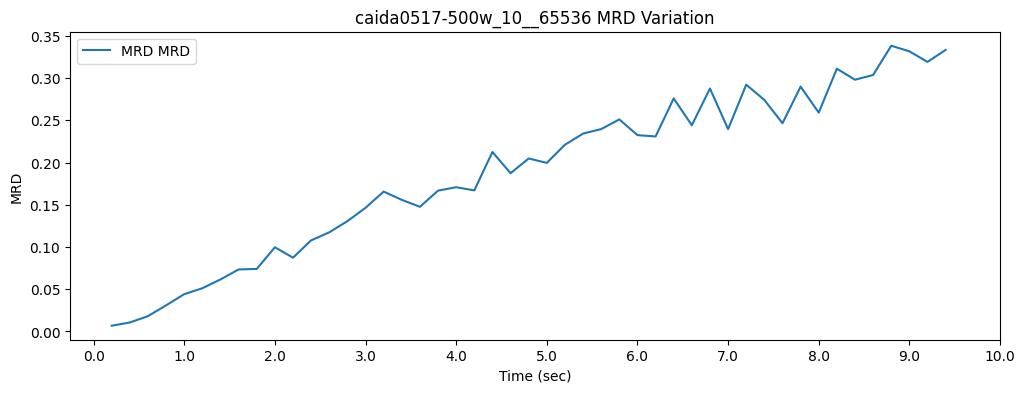

caida0517-250w_10__65536
[None, 0.0012, 0.00351288056206089, 0.004078857919782461, 0.008499787505312367, 0.007572172266919072, 0.016477857878475798, 0.015912208504801097, 0.016299426501660125, 0.018279231011660887, 0.026455026455026454, 0.02172338884866039, 0.04122965641952984, 0.03681942812377595, 0.03308964986533282, 0.040290088638195005, 0.040479140850888065, 0.039383561643835614, 0.04185623293903549, 0.0467246907924874, 0.049760765550239235, 0.04868355688027819, 0.045454545454545456, 0.04818042029728344, 0.06545454545454546, 0.059770114942528735, 0.05918481295365718, 0.07315700619020822, 0.06278026905829596, 0.07753846153846154, 0.07380952380952381, 0.07911001236093942, 0.06269993602047345, 0.07416563658838071, 0.08222643896268185, 0.07210626185958255, 0.07326007326007326, 0.09314359637774904, 0.07277628032345014, 0.09169435215946845, 0.07094133697135062, 0.08496291301416048, 0.10716981132075472, 0.106544901065449, 0.08856576338400529, 0.09927007299270073, 0.09482758620689655, 0.10

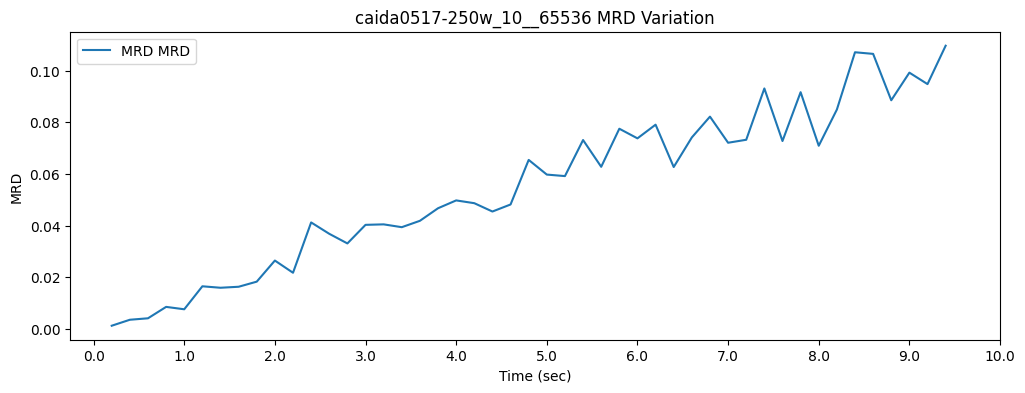

caida0517-125w_10__65536
[None, 0.0, 0.0, 0.0, 0.0004314994606256742, 0.0018957345971563982, 0.0015785319652722968, 0.003994293865905849, 0.004923076923076923, 0.0019274012206874397, 0.00418702023726448, 0.002117896223085069, 0.002967359050445104, 0.005638340716874748, 0.00642570281124498, 0.0034393809114359416, 0.007761966364812419, 0.012987012987012988, 0.009285051067780872, 0.005923000987166831, 0.004008016032064128, 0.012967581047381545, 0.012644889357218124, 0.01023541453428864, 0.015151515151515152, 0.010244735344336939, 0.01809954751131222, 0.02443280977312391, 0.011834319526627219, 0.008022922636103151, 0.020846106683016553, 0.014251781472684086, 0.03465003465003465, 0.013827781269641735, 0.017743979721166033, 0.013297872340425532, 0.017943409247757072, 0.013623978201634877, 0.019417475728155338, 0.0160857908847185, 0.03015075376884422, 0.01692524682651622, 0.020289855072463767, 0.022922636103151862, 0.013148283418553688, 0.024981631153563555, 0.030534351145038167, 0.0180722891

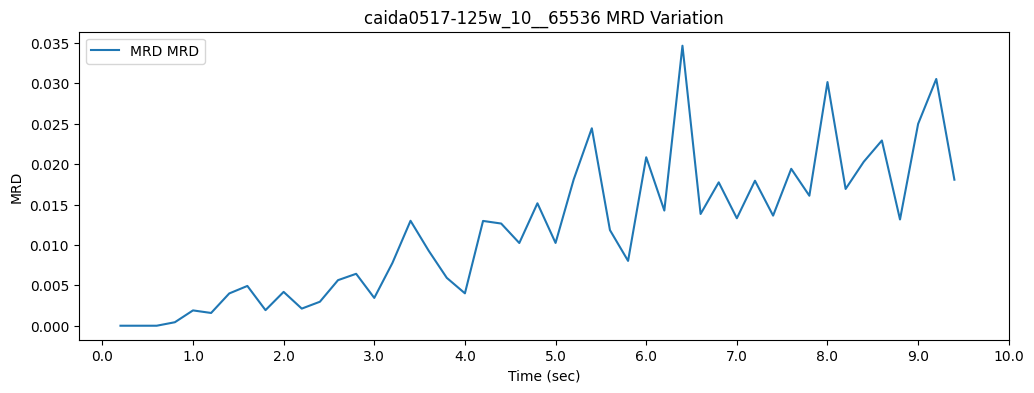

caida0816-600w_10__65536
[None, 0.0072, 0.009588842074676739, 0.02342404409231829, 0.031323414252153486, 0.05460599334073252, 0.049315068493150684, 0.06167400881057269, 0.06441136671177267, 0.09264305177111716, 0.10608800482218204, 0.0985352862849534, 0.10185185185185185, 0.12267401791867677, 0.1459799925898481, 0.11597456041900486, 0.14464218099204848, 0.1728395061728395, 0.19101123595505617, 0.1636828644501279, 0.17881944444444445, 0.1875, 0.21239705244906806, 0.18552875695732837, 0.2065167508031207, 0.19391634980988592, 0.21498371335504887, 0.257386079118678, 0.2208267922553637, 0.2215771649733914, 0.24410686223153483, 0.23293996921498203, 0.2564102564102564, 0.2561847168774052, 0.2548262548262548, 0.2627653471026965, 0.28108733371891265, 0.2768878718535469, 0.3014908890115958, 0.29947152084556666, 0.3081429408318688, 0.2975206611570248, 0.27979274611398963, 0.29870928088506454, 0.3204968944099379, 0.3214509068167605, 0.3371647509578544, 0.31876923076923075, 0.34814814814814815, 0.3

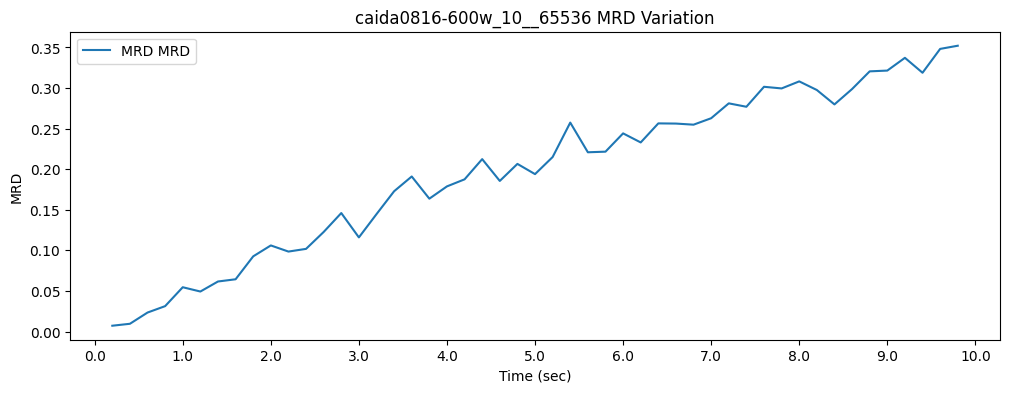

caida0816-300w_10__65536
[None, 0.0016, 0.0017462165308498253, 0.005522954780807732, 0.007529225282345948, 0.009302325581395349, 0.01108700891781152, 0.012976901116013496, 0.009478672985781991, 0.024124742571344514, 0.02110490378646803, 0.018494055482166448, 0.023303632625085675, 0.024147727272727272, 0.029476787030213707, 0.044657097288676235, 0.03995108030982471, 0.038461538461538464, 0.03594914511179308, 0.03869832893579595, 0.03967538322813345, 0.062238736646539713, 0.04452690166975881, 0.04222648752399232, 0.05785920925747348, 0.059672762271414825, 0.05416248746238716, 0.06233491811938722, 0.06246799795186892, 0.06993006993006994, 0.05837837837837838, 0.08080808080808081, 0.0727062896710906, 0.08473592571096925, 0.07950310559006211, 0.09477521263669501, 0.08369768894440974, 0.09547738693467336, 0.07552083333333333, 0.06905537459283388, 0.08695652173913043, 0.09171974522292993, 0.09278350515463918, 0.09641873278236915, 0.09251700680272108, 0.09606986899563319, 0.12718378756114604, 

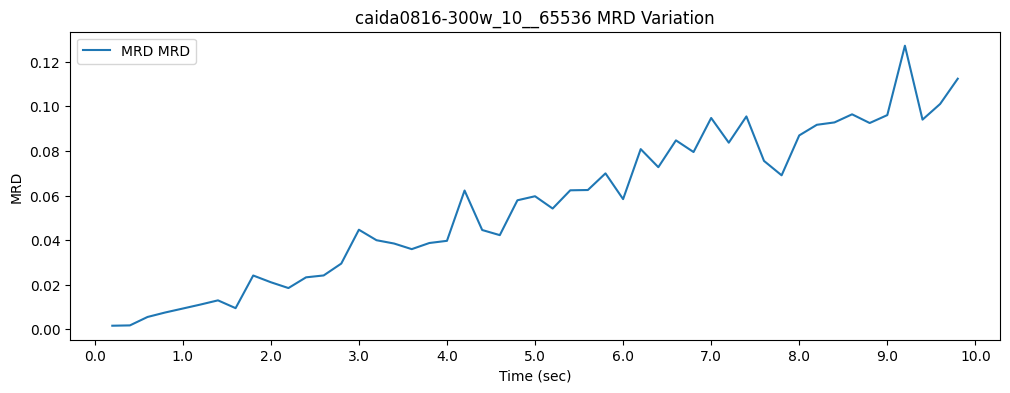

caida0816-150w_10__65536
[None, 0.0, 0.0008762961881115817, 0.0006975933031042902, 0.0007987220447284345, 0.003132691877377489, 0.0019559902200488996, 0.0, 0.005051922537187763, 0.0047169811320754715, 0.004944375772558714, 0.005494505494505495, 0.0062047569803516025, 0.007765619484645252, 0.0029154518950437317, 0.011815675462780622, 0.010547667342799188, 0.008658008658008658, 0.014648858250753986, 0.004293688278231, 0.0074142724745134385, 0.004593477262287551, 0.012627489072365225, 0.015082956259426848, 0.014141414141414142, 0.014404432132963989, 0.012552301255230125, 0.010940919037199124, 0.011560693641618497, 0.0045351473922902496, 0.012944983818770227, 0.013590033975084938, 0.016489988221436984, 0.03009259259259259, 0.02077922077922078, 0.028169014084507043, 0.020444978953698137, 0.013003901170351105, 0.010075566750629723, 0.023778071334214, 0.02025658338960162, 0.0280970625798212, 0.020028612303290415, 0.0177717019822283, 0.022304832713754646, 0.04885270170244264, 0.029455081001472

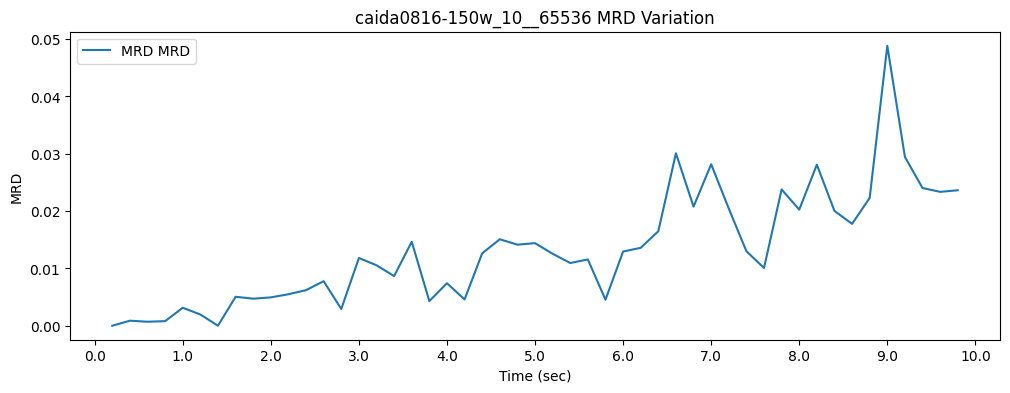

zipf2a-150w_10__65536
[None, 0.0004428697962798937, 0.0013382402141184342, 0.0022356360384529397, 0.005461496450027308, 0.005208333333333333, 0.016434440871739908, 0.015734989648033125, 0.030068337129840545, 0.038844149692089054, 0.03993154592127781, 0.05676126878130217, 0.05348988910632746, 0.05475040257648953, 0.06704824202780049, 0.08710217755443886, 0.10108303249097472, 0.09734513274336283, 0.13924050632911392, 0.10628019323671498, 0.1366906474820144, 0.13432835820895522, 0.13059701492537312, 0.13282732447817835, 0.14965986394557823, 0.1940755873340143, 0.1761006289308176, 0.20501138952164008, 0.19036954087346025, 0.27413587604290823, 0.22077922077922077, 0.25968109339407747, 0.20551378446115287, 0.26609442060085836, 0.2236842105263158, 0.242152466367713, 0.27287319422150885, 0.3177570093457944, 0.35139573070607555, 0.3460410557184751, 0.39774330042313116, 0.28826151560178304, 0.3146067415730337, 0.31839258114374036, 0.33580980683506684, 0.32919254658385094, 0.3986135181975737, 0.4

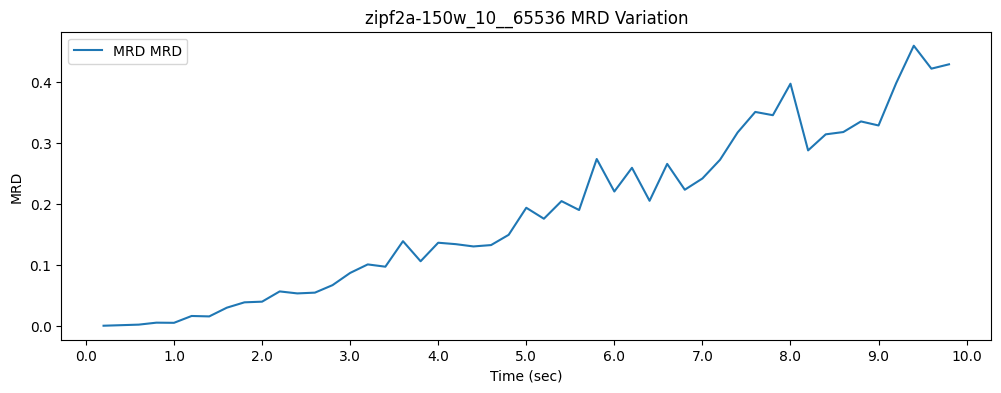

zipf2a-75w_10__65536
[None, 0.0, 0.0, 0.0009324009324009324, 0.0011031439602868175, 0.0019860973187686196, 0.002216475803472479, 0.0, 0.0044943820224719105, 0.008658008658008658, 0.003305785123966942, 0.012621916236374068, 0.02059202059202059, 0.016129032258064516, 0.00835421888053467, 0.01073345259391771, 0.01652892561983471, 0.01628423390081421, 0.026622296173044926, 0.029173419773095625, 0.025974025974025976, 0.01876172607879925, 0.016293279022403257, 0.04238143289606458, 0.04201680672268908, 0.05392156862745098, 0.027807486631016044, 0.03131991051454139, 0.04854368932038835, 0.05392156862745098, 0.04556962025316456, 0.057571964956195244, 0.04354136429608128, 0.07518796992481203, 0.024922118380062305, 0.06472491909385113, 0.06170598911070781, 0.062157221206581355, 0.11152416356877323, 0.07333333333333333, 0.12658227848101267, 0.10227272727272728, 0.10725552050473186, 0.11094452773613193, 0.08, 0.1164021164021164, 0.12269938650306748, 0.07142857142857142, 0.08870967741935484, 0.12142

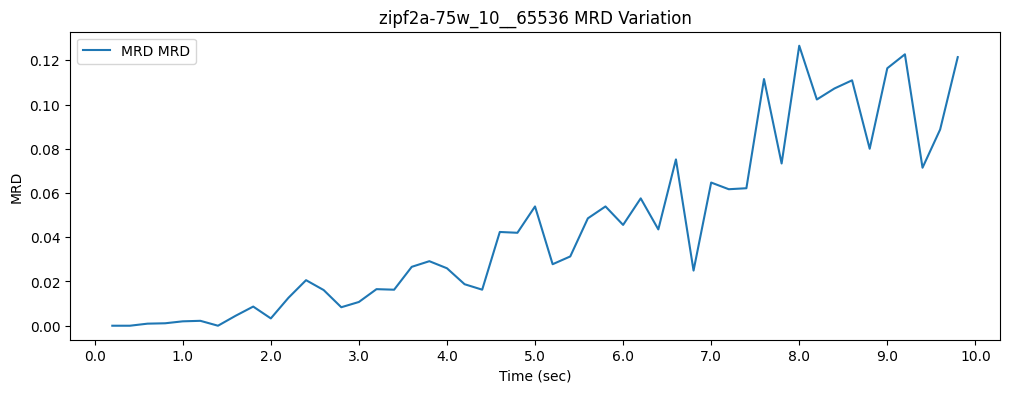

zipf2a-35w_10__65536
[None, 0.0, 0.0, 0.0, 0.0, 0.0009722897423432182, 0.0, 0.0019286403085824494, 0.0018587360594795538, 0.0, 0.0, 0.0011607661056297156, 0.005256241787122208, 0.00495458298926507, 0.0053523639607493305, 0.0, 0.001892147587511826, 0.0, 0.0033613445378151263, 0.0056022408963585435, 0.0038535645472061657, 0.003952569169960474, 0.008298755186721992, 0.006103763987792472, 0.006543075245365322, 0.0, 0.004357298474945534, 0.002355712603062426, 0.014563106796116505, 0.002430133657351154, 0.011918951132300357, 0.017521902377972465, 0.010723860589812333, 0.018944519621109608, 0.014388489208633094, 0.006329113924050633, 0.023769100169779286, 0.017953321364452424, 0.011131725417439703, 0.011090573012939002, 0.00625, 0.025396825396825397, 0.006535947712418301, 0.02385008517887564, 0.017152658662092625, 0.02460456942003515, 0.0466786355475763, 0.0, 0.018148820326678767, 0.020202020202020204]


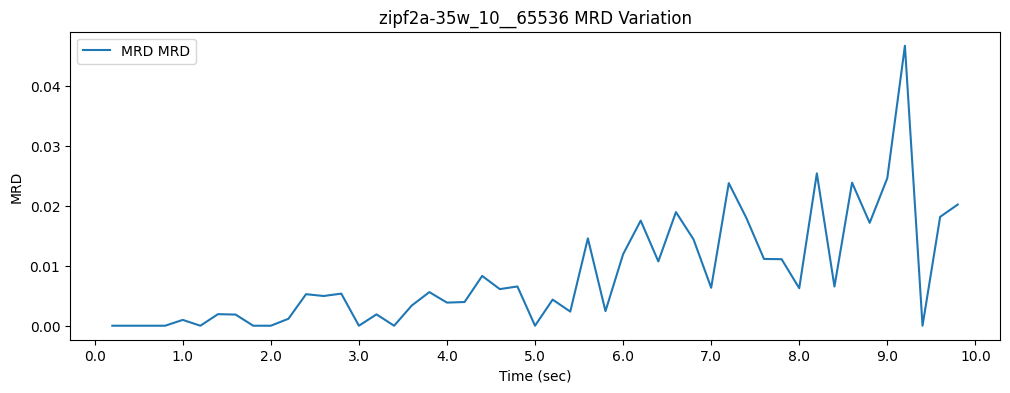

zipf2b-400w_10__65536
[None, 0.0472, 0.11852502194907814, 0.21634615384615385, 0.2973372781065089, 0.3718512594962015, 0.48444863336475025, 0.5386509108813392, 0.565356004250797, 0.6658595641646489, 0.6921606118546845, 0.7533123028391168, 0.7698630136986301, 0.8062283737024222, 0.8436681222707424, 0.8273972602739726, 0.8571428571428571, 0.8706240487062404, 0.8992, 0.9491525423728814, 0.8951747088186356, 0.9322033898305084, 0.9184397163120568, 0.912311780336581, 0.9094304388422035, 0.9570200573065902, 1.0317460317460319, 1.0039370078740157, 1.0801932367149758, 1.0204878048780488, 1.0558766859344895, 1.1691648822269807, 1.0826446280991735, 1.1658986175115207, 1.1784338896020539, 1.1568123393316196, 1.1074380165289257, 1.1666666666666667, 1.1398963730569949, 1.1388535031847133, 1.2064590542099192, 1.209142857142857, 1.2018038331454342, 1.1921664626682986, 1.191539365452409, 1.0960451977401129, 1.1793721973094171, 1.1658767772511849, 1.2197414806110458, 1.1920693928128872]


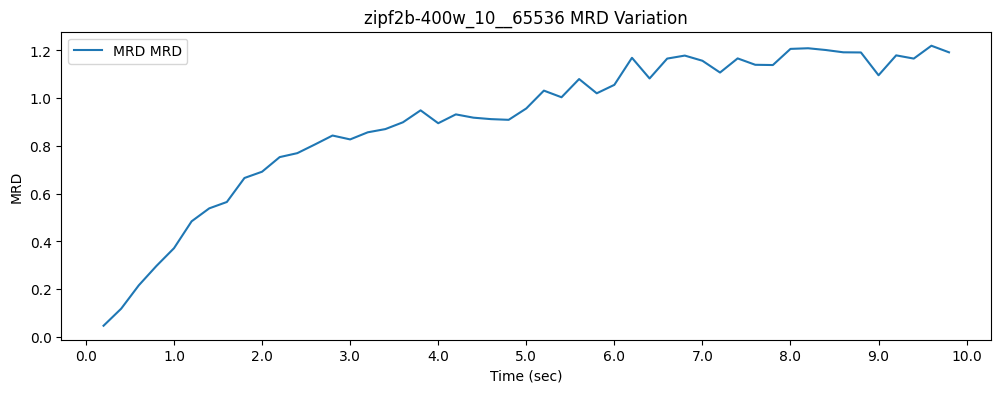

zipf2b-200w_10__65536
[None, 0.0052, 0.019720247649621648, 0.06282051282051282, 0.08976377952755905, 0.12773722627737227, 0.12967843964153927, 0.1963882618510158, 0.221665623043206, 0.19662921348314608, 0.27490909090909094, 0.3079136690647482, 0.31053901850362026, 0.34565434565434566, 0.38966630785791173, 0.4511930585683297, 0.43784378437843785, 0.45018450184501846, 0.4658077304261645, 0.45406546990496305, 0.46464646464646464, 0.49794238683127573, 0.5611814345991561, 0.5642256902761105, 0.48346055979643765, 0.5693430656934306, 0.5396825396825397, 0.6122448979591837, 0.7100271002710027, 0.6578947368421053, 0.682230869001297, 0.8064992614475628, 0.6481223922114048, 0.7186629526462396, 0.7649122807017544, 0.7236842105263158, 0.7251908396946565, 0.6732673267326733, 0.717434869739479, 0.8027681660899654, 0.8338368580060423, 0.7031963470319634, 0.8509316770186336, 0.7392739273927392, 0.8078175895765473, 0.7636363636363637, 0.8581081081081081, 0.8271604938271605, 0.8456375838926175, 0.7467166

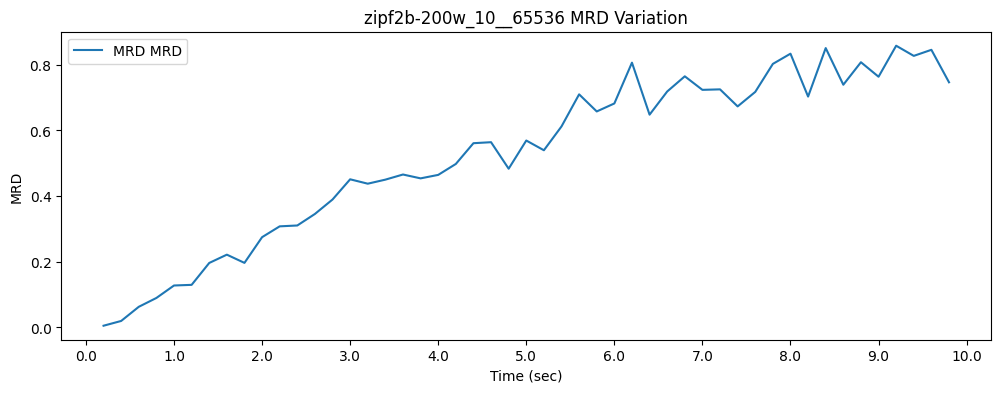

zipf2b-100w_10__65536
[None, 0.0016, 0.003217651114686279, 0.012129380053908356, 0.018803418803418803, 0.03137254901960784, 0.034934497816593885, 0.05454545454545454, 0.03361344537815126, 0.07173601147776183, 0.0736462093862816, 0.09045226130653267, 0.08450704225352113, 0.09896432681242807, 0.0761904761904762, 0.11267605633802817, 0.14742014742014742, 0.14736842105263157, 0.13559322033898305, 0.15492957746478872, 0.18446601941747573, 0.14527845036319612, 0.18562091503267975, 0.1881720430107527, 0.18128654970760233, 0.209366391184573, 0.21921515561569688, 0.16230366492146597, 0.20609579100145137, 0.22429906542056074, 0.22556390977443608, 0.26498422712933756, 0.3293718166383701, 0.29457364341085274, 0.3125, 0.2591093117408907, 0.30425963488843816, 0.3476482617586912, 0.3064516129032258, 0.36024844720496896, 0.3165217391304348, 0.2783882783882784, 0.3473053892215569, 0.3644067796610169, 0.3966597077244259, 0.3424124513618677, 0.3345724907063197, 0.32015065913371, 0.3793103448275862, 0.391

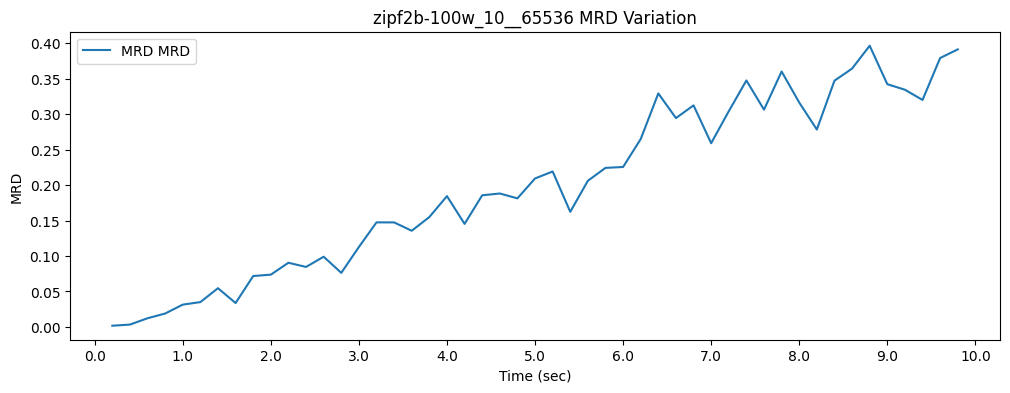

In [234]:
# predict_sketch_error_accumulate(width=widths, datasets=pcap_file, window_size=200, dev=3, ws=25)
predict_sketch_error_single_slot(width=[65536], datasets=pcap_file, window_size=200, dev=3, ws=25)

### Relationship between dataset length and FSD

In [235]:
def draw_flow_size_distribution(fsds):
    
    fs = []
    prob = []
    cdfs = []
    labels = []
    
    cnt = 0
    for fsd in fsds: 
        
        flow_size = list(fsd.keys())
        frequency = list(fsd.values())
        total_packets = sum([key * val for key, val in fsd.items()])
            
        # Calculate mean and variance
        flow_sizes_array = np.array(flow_size)
        frequencies_array = np.array(frequency)

        mean_flow_size = np.average(flow_sizes_array, weights=frequencies_array)
        variance_flow_size = np.average((flow_sizes_array - mean_flow_size)**2, weights=frequencies_array)
    
        # print("Mean Flow Size:", mean_flow_size)
        # print("Variance of Flow Size:", variance_flow_size)
        
        # Plot PDF & CDF
        total_flows = sum(frequency)
        probabilities = [freq / total_flows for freq in frequency]
        # print(flow_size)
        print("Total Flows: ", total_flows)
        print("Total Packets: ", total_packets)
        print("Density: ", int(total_packets/total_flows))
        # print(probabilities)
        
        cdf = np.cumsum(probabilities)
        
        fs.append(flow_size)
        prob.append(probabilities)
        cdfs.append(cdf)
        labels.append(f't{2*cnt+1}-t{2*cnt+2}')
        cnt += 1
    
    labels[-1] = "gt"
    plt.figure(figsize=(10, 5))
    # Plot PDF
    plt.subplot(1, 2, 1)
    
    for i in range(len(fs)):
        plt.plot(fs[i], prob[i], linestyle='-', label = labels[i])
    
    # plt.bar(flow_size, probabilities, width=1.0, color='blue', alpha=0.7)
    plt.title('Probability Density Function (PDF)')
    plt.xlabel('Flow Size')
    plt.ylabel('Probability')
    plt.legend(loc="upper right")
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10,10000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set specific tick positions
    plt.grid(True)
    
    # Plot CDF
    plt.subplot(1, 2, 2)
    for i in range(len(fs)):
        plt.plot(fs[i], cdfs[i], linestyle='-', label = labels[i])
    plt.title('Cumulative Distribution Function (CDF)')
    plt.xlabel('Flow Size')
    plt.ylabel('Cumulative Probability')
    plt.legend(loc="lower right")
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10,100000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set specific tick positions

    plt.grid(True)
    
    
    plt.tight_layout()
    plt.show()
    
# draw_flow_size_distribution("/home/ming/SketchMercator/traffic_sampler/fs_dist/fs_dist.txt")

def cal_fsd(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', epochs=['10'], window_size=200):
    profiler_file = []
    
    profiler_folder_path = "/home/ming/SketchMercator/pattern_detection/traffic_generator/pcap_file/"
    for file_name in sorted(os.listdir(profiler_folder_path)):
        if file_name.split("-")[0] == "zipf4":
            continue
        profiler_file.append(file_name)
        # has_same_dist = 0
        # if file_name.split("-")[0] == "zipf4":
        #     continue
        # for item in profiler_file:
        #     if file_name.split("-")[0] == item.split("-")[0]:
        #         has_same_dist = 1
        #         break
        # if has_same_dist == 0:
        #     profiler_file.append(file_name)
        
    

    for epoch in epochs:
        for file in profiler_file:
            path = f"../SketchPatternQuery/{algo}/{file}/"\
                    f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
            
            est_fsd = []
            for dir in sorted(os.listdir(path)):
                p = os.path.join(path, dir)
                if os.path.isdir(p): 
                    window_dir = "window_" + str(window_size)
                    dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_gt_summation")
                    
                    all_fsd = []
                    for window_file in sorted(os.listdir(dynamic_full_path)):  
                        fsd_file = os.path.join(dynamic_full_path, window_file)
                        fsd = {}
                        with open(fsd_file, 'r') as f:
                            for line in f:
                                if int(line.strip().split()[0]) == 0:
                                    continue
                                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                                
                        all_fsd.append(fsd)
                        
                    
                    for i in range(0, 5):
                        start = 10*i
                        end = min(10*i+10, len(all_fsd))
                        all_keys = sorted(set().union(*[d.keys() for d in all_fsd[start:end]]))
                        sum_fsd = {key: 0 for key in all_keys}
                        for d in all_fsd[start:end]:
                            for key, val in d.items():
                                sum_fsd[key] = sum_fsd[key] + val
                    
                        avg_fsd = {key: int(math.ceil(val/len(all_fsd[start:end])))*len(all_fsd) for key, val in sum_fsd.items()}
                        est_fsd.append(avg_fsd)
                        
                    
            gt_fsd = {}
            fileName = f"/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist/{file[:-9]}.txt"
            with open(fileName, "r") as ff:
                for line in ff:
                    items = line.strip().split(" ")
                    gt_fsd[int(items[0])] = int(items[1])
                    
            est_fsd.append(gt_fsd)
            
            draw_flow_size_distribution(est_fsd)


Total Flows:  26928
Total Packets:  919296
Density:  34
Total Flows:  13968
Total Packets:  311280
Density:  22
Total Flows:  11712
Total Packets:  422112
Density:  36
Total Flows:  10224
Total Packets:  409056
Density:  40
Total Flows:  8928
Total Packets:  359952
Density:  40
Total Flows:  26938
Total Packets:  1254001
Density:  46


/tmp/ipykernel_37267/3925704888.py:57: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10,10000])
/tmp/ipykernel_37267/3925704888.py:71: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10,100000])


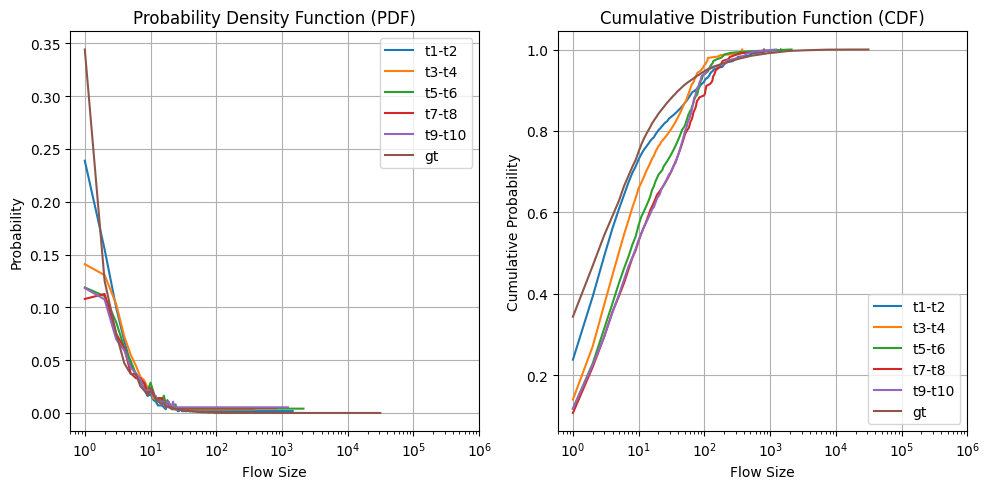

Total Flows:  27120
Total Packets:  1088688
Density:  40
Total Flows:  15456
Total Packets:  671472
Density:  43
Total Flows:  13248
Total Packets:  708048
Density:  53
Total Flows:  12096
Total Packets:  761568
Density:  62
Total Flows:  10752
Total Packets:  682032
Density:  63
Total Flows:  53878
Total Packets:  2441598
Density:  45


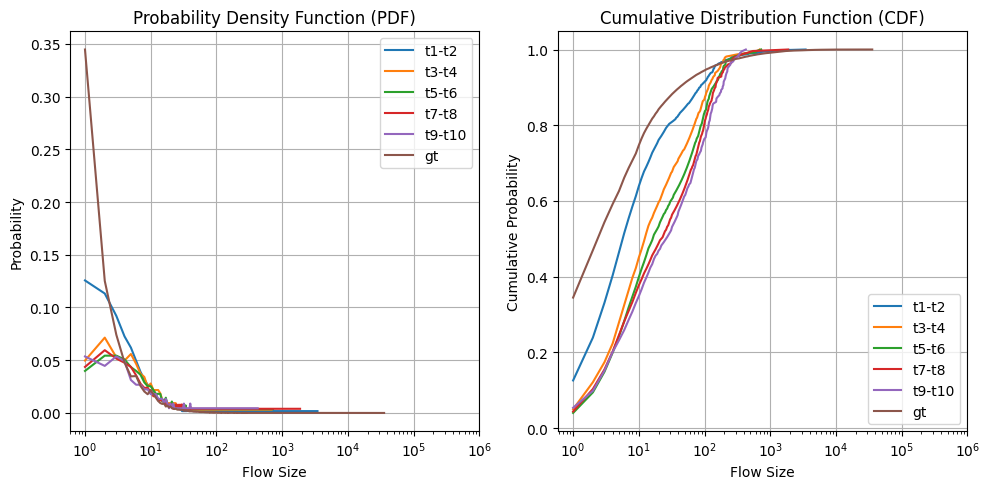

Total Flows:  27600
Total Packets:  1530432
Density:  55
Total Flows:  17904
Total Packets:  1457520
Density:  81
Total Flows:  16896
Total Packets:  2176176
Density:  128
Total Flows:  16320
Total Packets:  2647056
Density:  162
Total Flows:  14208
Total Packets:  2355360
Density:  165
Total Flows:  107755
Total Packets:  5061345
Density:  46


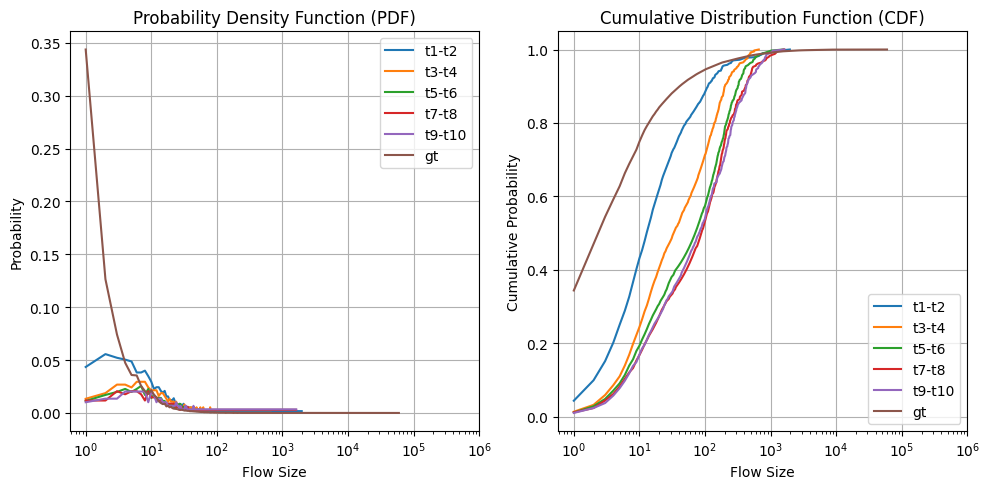

Total Flows:  30650
Total Packets:  1181050
Density:  38
Total Flows:  16600
Total Packets:  667150
Density:  40
Total Flows:  12100
Total Packets:  372450
Density:  30
Total Flows:  11050
Total Packets:  366050
Density:  33
Total Flows:  10950
Total Packets:  489900
Density:  44
Total Flows:  28343
Total Packets:  1519854
Density:  53


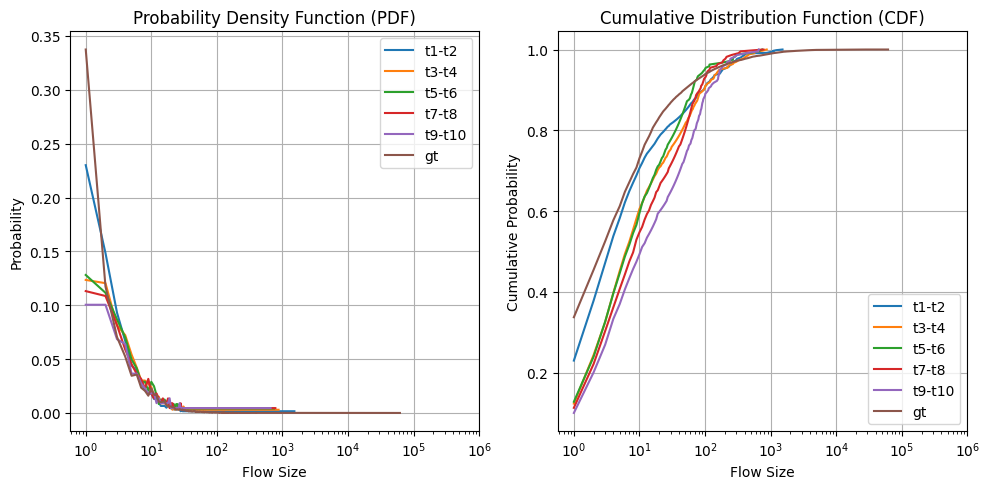

Total Flows:  29950
Total Packets:  973700
Density:  32
Total Flows:  17350
Total Packets:  850500
Density:  49
Total Flows:  14750
Total Packets:  910000
Density:  61
Total Flows:  14650
Total Packets:  1359050
Density:  92
Total Flows:  12750
Total Packets:  994600
Density:  78
Total Flows:  56686
Total Packets:  2933291
Density:  51


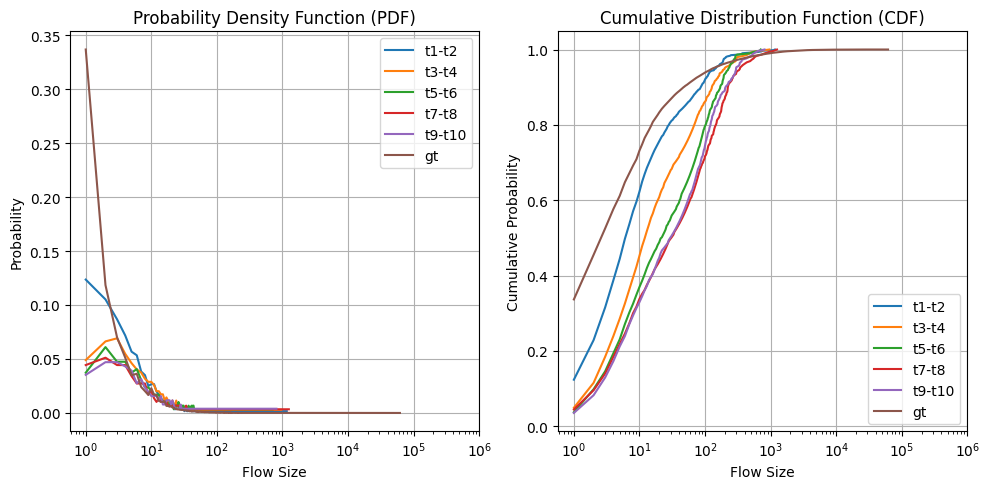

Total Flows:  31450
Total Packets:  1598850
Density:  50
Total Flows:  20500
Total Packets:  1812400
Density:  88
Total Flows:  18550
Total Packets:  2327600
Density:  125
Total Flows:  18150
Total Packets:  3062450
Density:  168
Total Flows:  16450
Total Packets:  3372550
Density:  205
Total Flows:  113373
Total Packets:  5857213
Density:  51


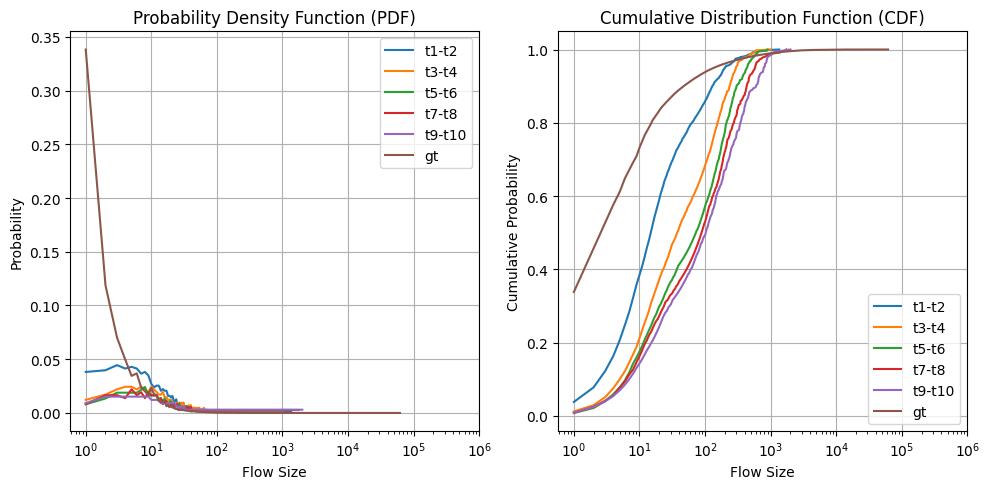

Total Flows:  23600
Total Packets:  1348200
Density:  57
Total Flows:  9300
Total Packets:  387600
Density:  41
Total Flows:  7050
Total Packets:  241300
Density:  34
Total Flows:  5300
Total Packets:  203700
Density:  38
Total Flows:  5600
Total Packets:  262400
Density:  46
Total Flows:  77378
Total Packets:  1386301
Density:  17


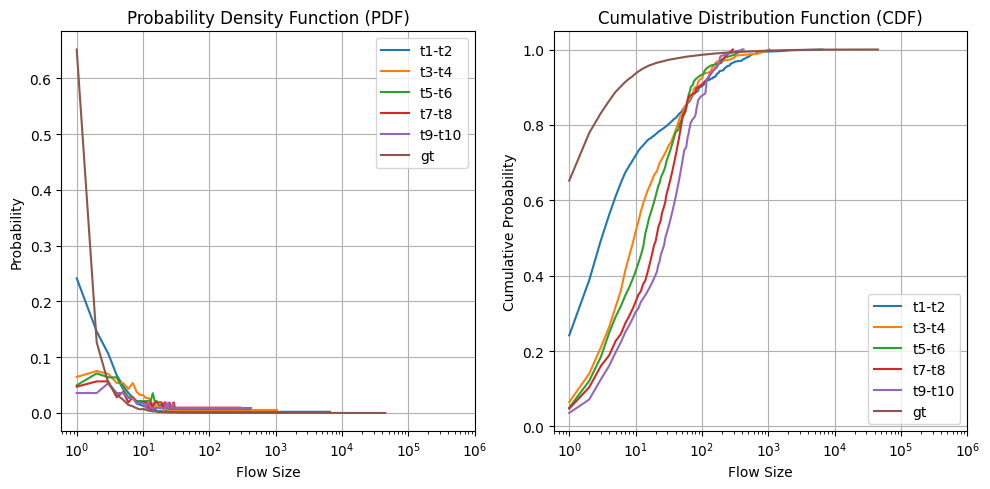

Total Flows:  23450
Total Packets:  678150
Density:  28
Total Flows:  8800
Total Packets:  272700
Density:  30
Total Flows:  6900
Total Packets:  296550
Density:  42
Total Flows:  4750
Total Packets:  121000
Density:  25
Total Flows:  4900
Total Packets:  177250
Density:  36
Total Flows:  19344
Total Packets:  338316
Density:  17


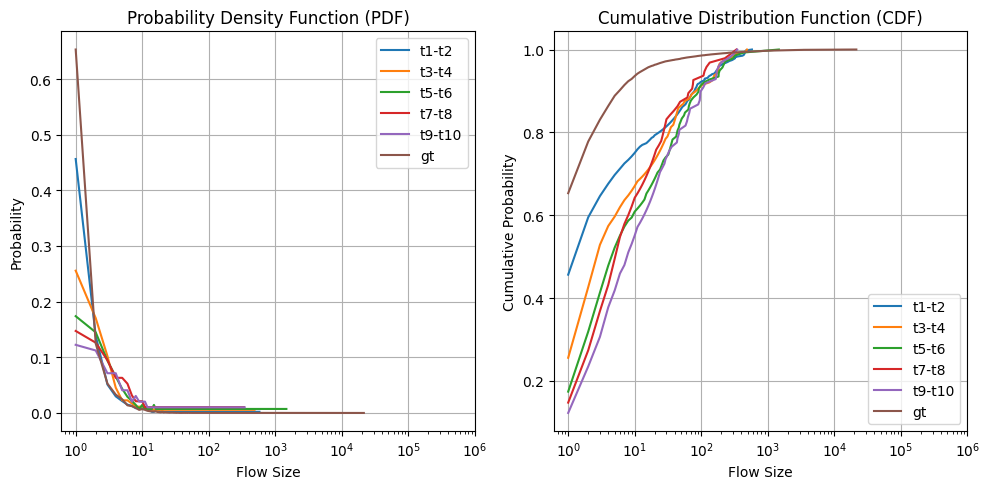

Total Flows:  23450
Total Packets:  881300
Density:  37
Total Flows:  8800
Total Packets:  355150
Density:  40
Total Flows:  6850
Total Packets:  241550
Density:  35
Total Flows:  5100
Total Packets:  166400
Density:  32
Total Flows:  5300
Total Packets:  275400
Density:  51
Total Flows:  38689
Total Packets:  731704
Density:  18


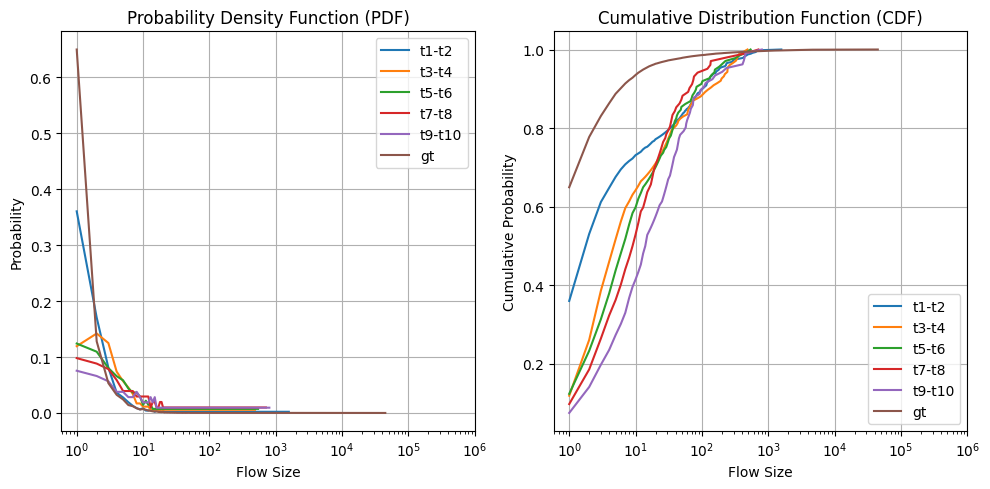

Total Flows:  17650
Total Packets:  452100
Density:  25
Total Flows:  6450
Total Packets:  169450
Density:  26
Total Flows:  5450
Total Packets:  169050
Density:  31
Total Flows:  3900
Total Packets:  173050
Density:  44
Total Flows:  4600
Total Packets:  239000
Density:  51
Total Flows:  71827
Total Packets:  1109631
Density:  15


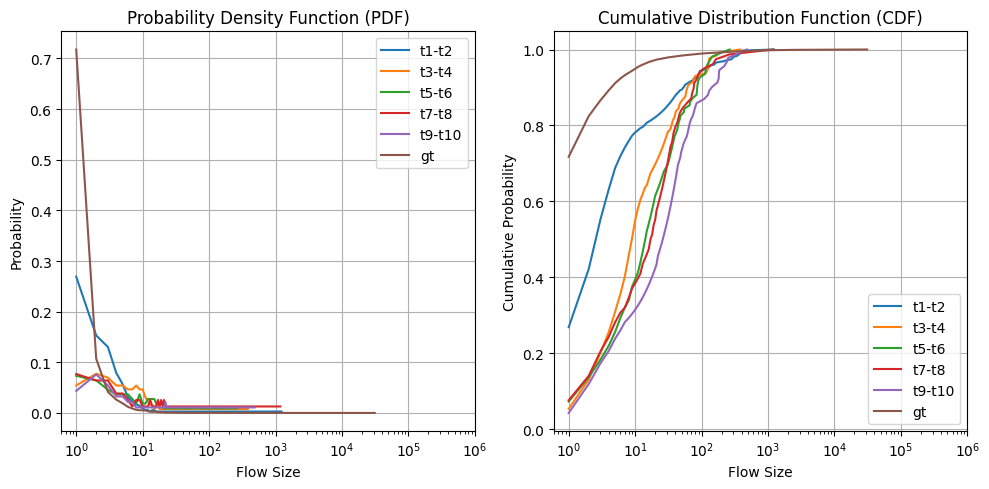

Total Flows:  18750
Total Packets:  625750
Density:  33
Total Flows:  7450
Total Packets:  336050
Density:  45
Total Flows:  6400
Total Packets:  377450
Density:  58
Total Flows:  5900
Total Packets:  343600
Density:  58
Total Flows:  6150
Total Packets:  382450
Density:  62
Total Flows:  143654
Total Packets:  2091396
Density:  14


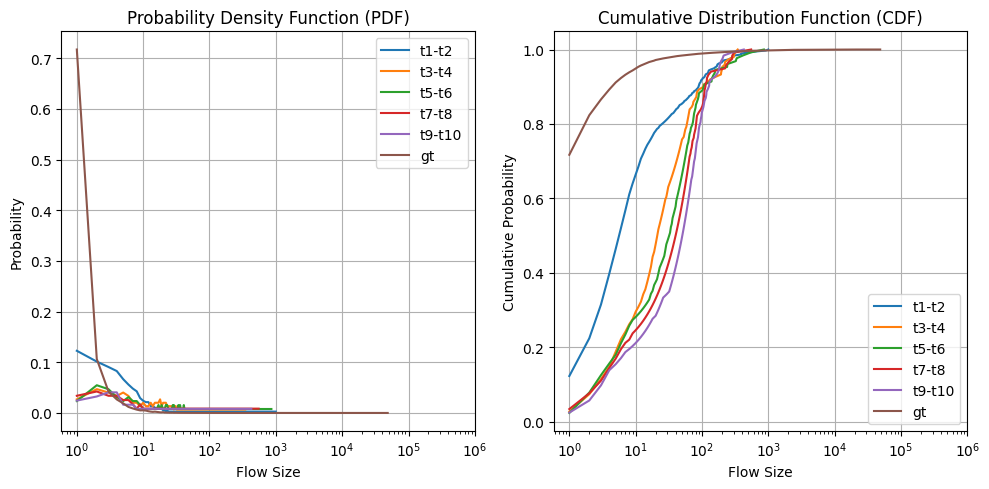

Total Flows:  18500
Total Packets:  686500
Density:  37
Total Flows:  9750
Total Packets:  880750
Density:  90
Total Flows:  9600
Total Packets:  1055400
Density:  109
Total Flows:  9400
Total Packets:  1066800
Density:  113
Total Flows:  9000
Total Packets:  1392900
Density:  154
Total Flows:  287308
Total Packets:  4237097
Density:  14


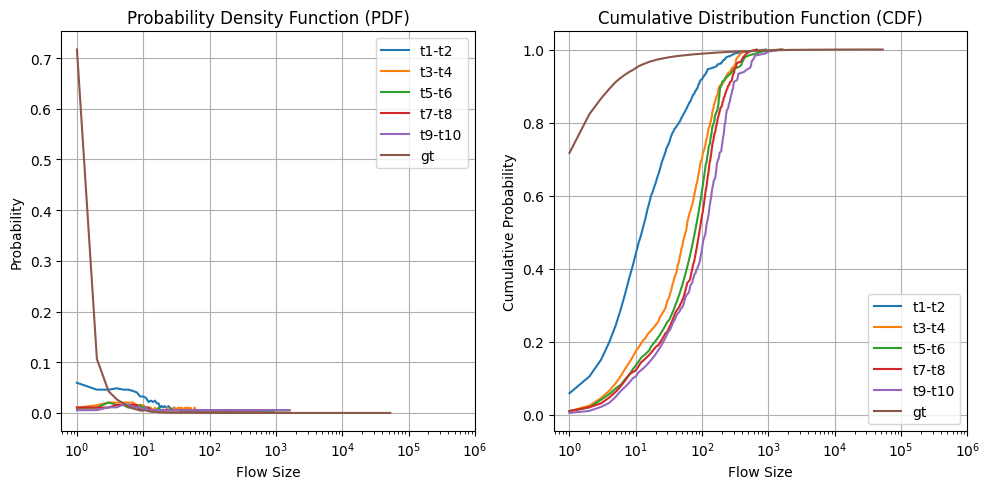

In [236]:
cal_fsd()